# 2020년 청소년 매체이용 및 유해환경 실태조사

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [2]:
data = pd.read_excel('청소년 매체이용 및 유해환경 실태조사.xlsx')

In [3]:
data.drop(0, axis=0, inplace=True)

In [4]:
data.columns

Index(['ID', 'ID_1', 'ID_2', 'GUBUN', 'S_NAME', 'AGREE', 'YM0101A', 'YM0101B',
       'YM0101C', 'YM0102A',
       ...
       'DDM2', 'DDM3', 'DDM4', 'DDM5', 'DDM6', 'DDM7', 'DDM8', 'DDM9', 'DDM10',
       'DDM11'],
      dtype='object', length=580)

In [5]:
# 단변량 분석 (범주형 데이터)
# 범주별 빈도수, 범주별 비율, barchart
def uni_eda_c(data, target):
    print('[ 범주별 빈도수 ]')
    display(pd.DataFrame(data[target].value_counts()).T)
    print()
    print('[ 범주별 비율 ]')
    display(pd.DataFrame(data[target].value_counts()/data.shape[0]).T)
    print()
    print('[ Bar Chart ]')
    sns.countplot(x=data[target])
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

In [6]:
data1 = data.copy()

# 💛 매체 이용

## ❗ 지상파 TV 방송 (KBS, MBC, SBS, EBS)

[ 범주별 빈도수 ]


,이용했음,전혀 이용 안함,무응답
YM0101A,12700,1764,72


,1주 1~2회,거의 매일,1달 1~2회,1년 3~4회,무응답
YM0101B,5603,4753,1726,493,125


,TV,태블릿 PC/스마트패드,PC/노트북,무응답
YM0101C,9132,2364,680,275



[ 범주별 비율 ]


,이용했음,전혀 이용 안함,무응답
YM0101A,0.873693,0.121354,0.004953


,1주 1~2회,거의 매일,1달 1~2회,1년 3~4회,무응답
YM0101B,0.385457,0.326981,0.11874,0.033916,0.008599


,TV,태블릿 PC/스마트패드,PC/노트북,무응답
YM0101C,0.628233,0.162631,0.04678,0.018919



[ Bar Chart ]


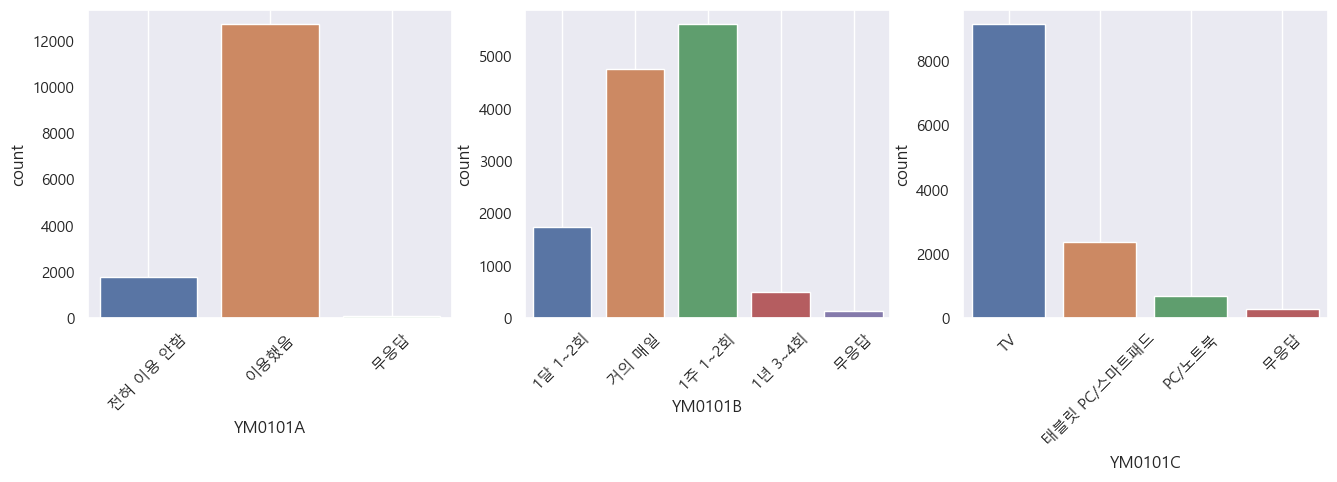

In [7]:
# 단변량 분석 (범주형 데이터)
# 범주별 빈도수, 범주별 비율, barchart
def uni_eda_c(data, target1, target2, target3):
    map_dict1 = {1: '이용했음', 2: '전혀 이용 안함', 8: '응답', 9:'무응답'}
    map_dict2 = {1: '거의 매일', 2: '1주 1~2회', 3: '1달 1~2회', 4: '1년 3~4회', 9: '무응답'}
    map_dict3 = {1: 'PC/노트북', 2: '태블릿 PC/스마트패드', 4: 'TV', 9: '무응답'}
    
    data[target1] = data[target1].map(map_dict1)
    data[target2] = data[target2].map(map_dict2)
    data[target3] = data[target3].map(map_dict3)
    
    print('[ 범주별 빈도수 ]')
    display(pd.DataFrame(data[target1].value_counts()).T)
    display(pd.DataFrame(data[target2].value_counts()).T)
    display(pd.DataFrame(data[target3].value_counts()).T)
    print()
    print('[ 범주별 비율 ]')
    display(pd.DataFrame(data[target1].value_counts()/data.shape[0]).T)
    display(pd.DataFrame(data[target2].value_counts()/data.shape[0]).T)
    display(pd.DataFrame(data[target3].value_counts()/data.shape[0]).T)
    print()
    print('[ Bar Chart ]')
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    sns.countplot(x=data[target1])
    plt.grid()
    plt.xticks(rotation=45)
    plt.subplot(1, 3, 2)
    sns.countplot(x=data[target2])
    plt.grid()
    plt.xticks(rotation=45)
    plt.subplot(1, 3, 3)
    sns.countplot(x=data[target3])
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

uni_eda_c(data1, 'YM0101A', 'YM0101B', 'YM0101C')

## ❗ 지상파를 제외한 TV방송(tvN, Mnet, OCN, JTBC 등)

[ 범주별 빈도수 ]


,이용했음,전혀 이용 안함,무응답
YM0102A,12235,2202,99


,1주 1~2회,거의 매일,1달 1~2회,1년 3~4회,무응답
YM0102B,5758,4224,1696,421,136


,TV,태블릿 PC/스마트패드,PC/노트북,무응답
YM0102C,8550,2425,614,367



[ 범주별 비율 ]


,이용했음,전혀 이용 안함,무응답
YM0102A,0.841703,0.151486,0.006811


,1주 1~2회,거의 매일,1달 1~2회,1년 3~4회,무응답
YM0102B,0.39612,0.290589,0.116676,0.028963,0.009356


,TV,태블릿 PC/스마트패드,PC/노트북,무응답
YM0102C,0.588195,0.166827,0.04224,0.025248



[ Bar Chart ]


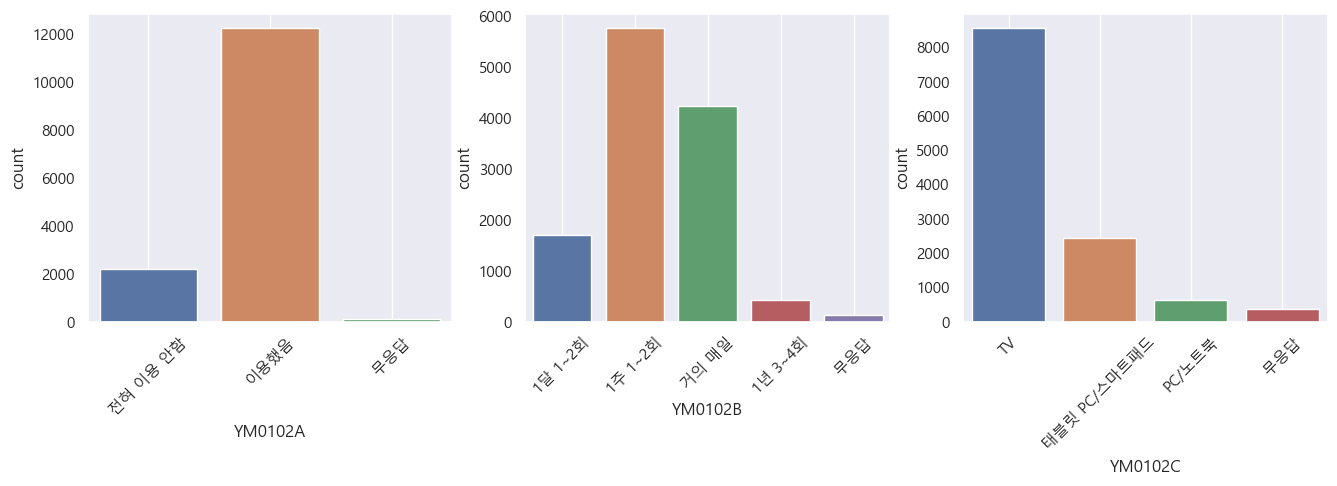

In [8]:
uni_eda_c(data1, 'YM0102A', 'YM0102B', 'YM0102C')

## ❗ 온라인동영상제공서비스(OTT)

[ 범주별 빈도수 ]


,이용했음,전혀 이용 안함,무응답
YM0103A,8586,5826,124


,1주 1~2회,거의 매일,1달 1~2회,1년 3~4회,무응답
YM0103B,3038,2495,2061,807,185


,태블릿 PC/스마트패드,TV,PC/노트북,무응답
YM0103C,3743,2097,1523,335



[ 범주별 비율 ]


,이용했음,전혀 이용 안함,무응답
YM0103A,0.590671,0.400798,0.008531


,1주 1~2회,거의 매일,1달 1~2회,1년 3~4회,무응답
YM0103B,0.208998,0.171643,0.141786,0.055517,0.012727


,태블릿 PC/스마트패드,TV,PC/노트북,무응답
YM0103C,0.257499,0.144263,0.104774,0.023046



[ Bar Chart ]


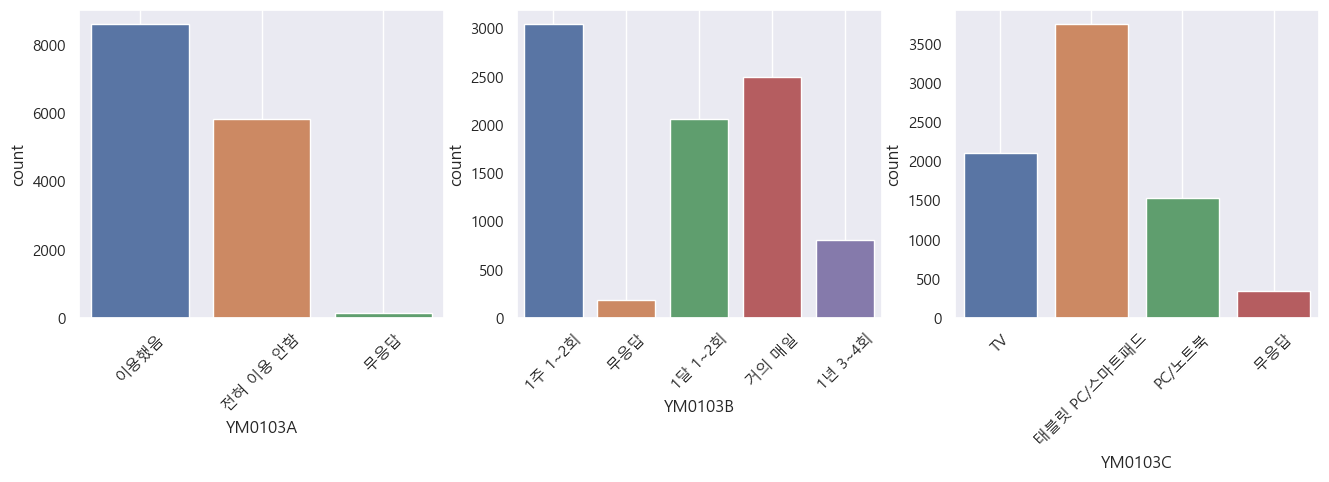

In [9]:
uni_eda_c(data1, 'YM0103A', 'YM0103B', 'YM0103C')

## ❗ 종이 신문

In [10]:
def uni_eda_c2(data, target1, target2):
    map_dict1 = {1: '이용했음', 2: '전혀 이용 안함', 8: '응답', 9:'무응답'}
    map_dict2 = {1: '거의 매일', 2: '1주 1~2회', 3: '1달 1~2회', 4: '1년 3~4회', 9: '무응답'}
    
    data[target1] = data[target1].map(map_dict1)
    data[target2] = data[target2].map(map_dict2)
    
    print('[ 범주별 빈도수 ]')
    display(pd.DataFrame(data[target1].value_counts()).T)
    display(pd.DataFrame(data[target2].value_counts()).T)
    print()
    print('[ 범주별 비율 ]')
    display(pd.DataFrame(data[target1].value_counts()/data.shape[0]).T)
    display(pd.DataFrame(data[target2].value_counts()/data.shape[0]).T)
    print()
    print('[ Bar Chart ]')
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(x=data[target1])
    plt.grid()
    plt.xticks(rotation=45)
    plt.subplot(1, 2, 2)
    sns.countplot(x=data[target2])
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

[ 범주별 빈도수 ]


,전혀 이용 안함,이용했음,무응답
YM0104A,12547,1886,103


,1년 3~4회,1달 1~2회,1주 1~2회,거의 매일,무응답
YM0104B,923,453,292,204,14



[ 범주별 비율 ]


,전혀 이용 안함,이용했음,무응답
YM0104A,0.863167,0.129747,0.007086


,1년 3~4회,1달 1~2회,1주 1~2회,거의 매일,무응답
YM0104B,0.063498,0.031164,0.020088,0.014034,0.000963



[ Bar Chart ]


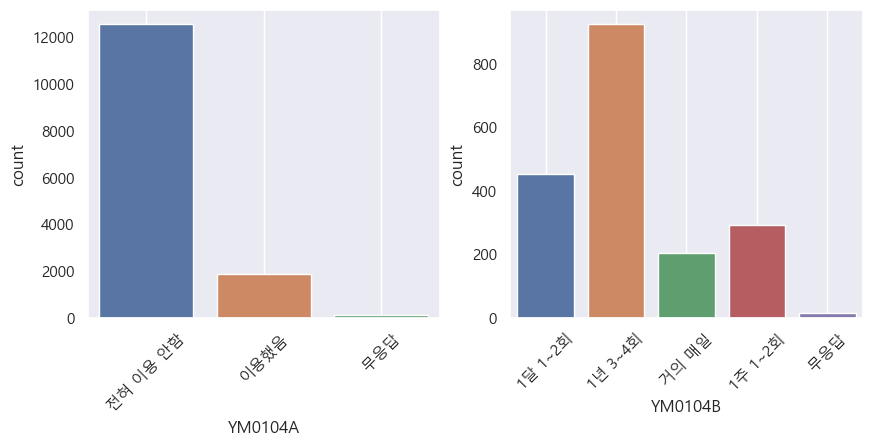

In [11]:
uni_eda_c2(data1, 'YM0104A', 'YM0104B')

## ❗ 종이 만화책

[ 범주별 빈도수 ]


,전혀 이용 안함,이용했음,무응답
YM0105A,8001,6434,101


,1달 1~2회,1년 3~4회,1주 1~2회,거의 매일,무응답
YM0105B,2197,1887,1558,736,56



[ 범주별 비율 ]


,전혀 이용 안함,이용했음,무응답
YM0105A,0.550427,0.442625,0.006948


,1달 1~2회,1년 3~4회,1주 1~2회,거의 매일,무응답
YM0105B,0.151142,0.129816,0.107182,0.050633,0.003853



[ Bar Chart ]


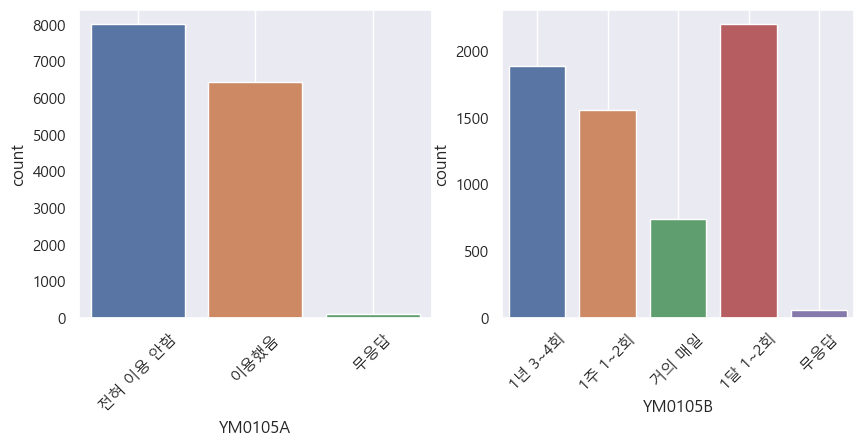

In [12]:
uni_eda_c2(data1, 'YM0105A', 'YM0105B')

## ❗ 종이 잡지 또는 책

[ 범주별 빈도수 ]


,이용했음,전혀 이용 안함,무응답
YM0106A,7977,6446,113


,1달 1~2회,1주 1~2회,거의 매일,1년 3~4회,무응답
YM0106B,2671,2545,1427,1286,48



[ 범주별 비율 ]


,이용했음,전혀 이용 안함,무응답
YM0106A,0.548775,0.443451,0.007774


,1달 1~2회,1주 1~2회,거의 매일,1년 3~4회,무응답
YM0106B,0.183751,0.175083,0.09817,0.08847,0.003302



[ Bar Chart ]


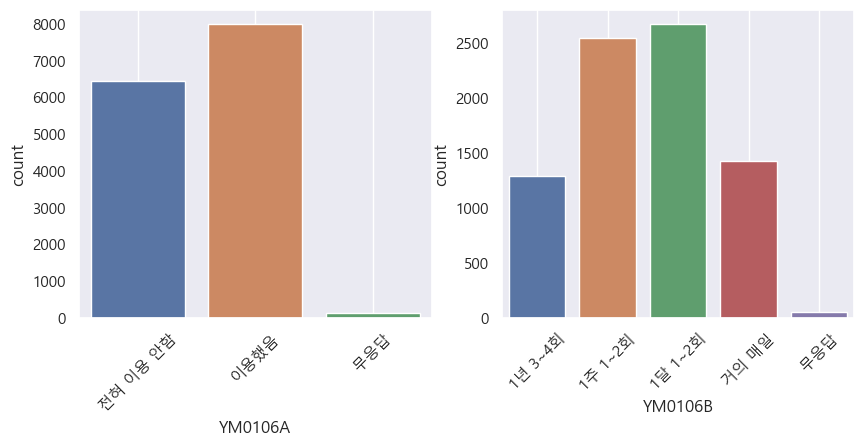

In [13]:
uni_eda_c2(data1, 'YM0106A', 'YM0106B')

## ❗ 인터넷 신문

[ 범주별 빈도수 ]


,전혀 이용 안함,이용했음,무응답
YM0107A,7500,6955,81


,1주 1~2회,1달 1~2회,거의 매일,1년 3~4회,무응답
YM0107B,2593,1973,1522,750,117


,태블릿 PC/스마트패드,PC/노트북,무응답,TV
YM0107C,5188,847,603,165



[ 범주별 비율 ]


,전혀 이용 안함,이용했음,무응답
YM0107A,0.51596,0.478467,0.005572


,1주 1~2회,1달 1~2회,거의 매일,1년 3~4회,무응답
YM0107B,0.178385,0.135732,0.104706,0.051596,0.008049


,태블릿 PC/스마트패드,PC/노트북,무응답,TV
YM0107C,0.356907,0.058269,0.041483,0.011351



[ Bar Chart ]


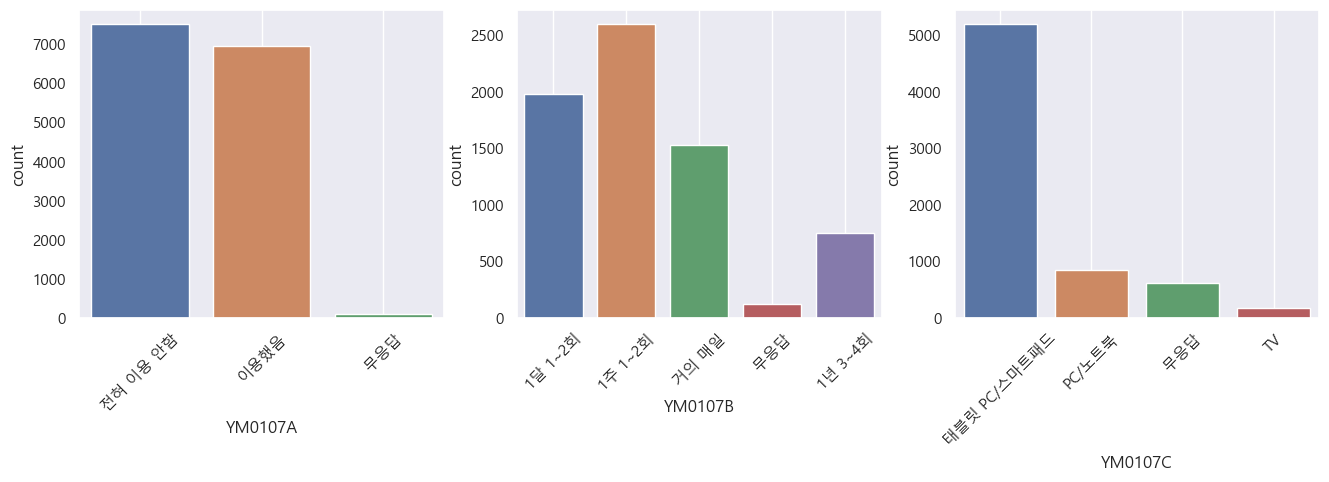

In [14]:
uni_eda_c(data1, 'YM0107A', 'YM0107B', 'YM0107C')

## ❗ 인터넷 만화(웹툰)

[ 범주별 빈도수 ]


,이용했음,전혀 이용 안함,무응답
YM0108A,10392,4083,61


,거의 매일,1주 1~2회,1달 1~2회,1년 3~4회,무응답
YM0108B,5638,2867,1185,605,97


,태블릿 PC/스마트패드,PC/노트북,무응답,TV
YM0108C,9212,489,388,81



[ 범주별 비율 ]


,이용했음,전혀 이용 안함,무응답
YM0108A,0.714915,0.280889,0.004196


,거의 매일,1주 1~2회,1달 1~2회,1년 3~4회,무응답
YM0108B,0.387865,0.197234,0.081522,0.041621,0.006673


,태블릿 PC/스마트패드,PC/노트북,무응답,TV
YM0108C,0.633737,0.033641,0.026692,0.005572



[ Bar Chart ]


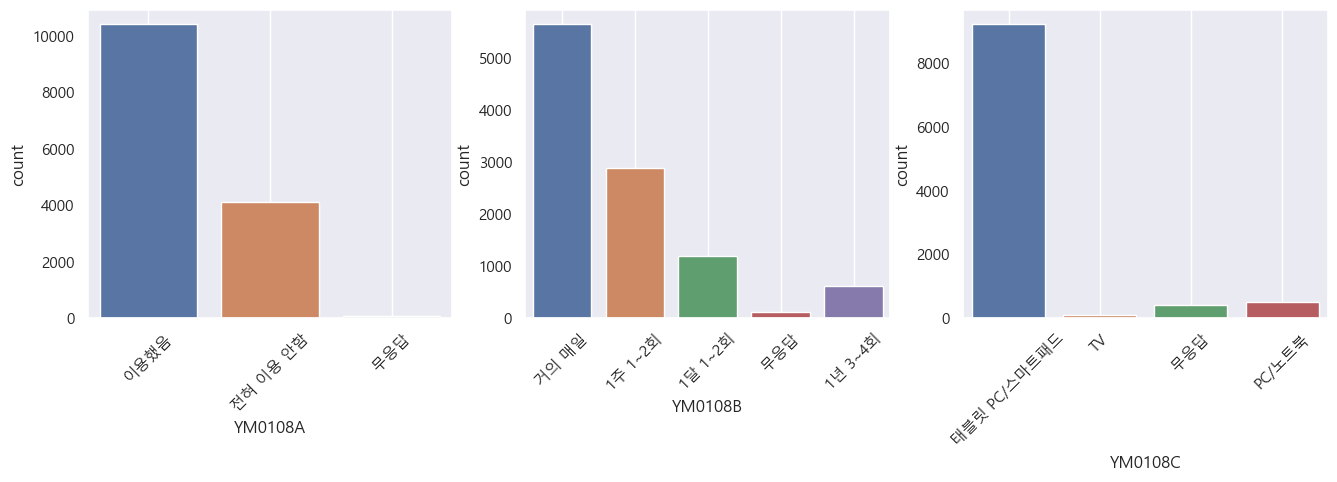

In [15]:
uni_eda_c(data1, 'YM0108A', 'YM0108B', 'YM0108C')

## ❗ 인터넷 잡지 및 전자책

[ 범주별 빈도수 ]


,전혀 이용 안함,이용했음,무응답
YM0109A,11340,3074,122


,1달 1~2회,1주 1~2회,1년 3~4회,거의 매일,무응답
YM0109B,898,767,749,529,131


,태블릿 PC/스마트패드,PC/노트북,무응답,TV
YM0109C,1933,480,213,65



[ 범주별 비율 ]


,전혀 이용 안함,이용했음,무응답
YM0109A,0.780132,0.211475,0.008393


,1달 1~2회,1주 1~2회,1년 3~4회,거의 매일,무응답
YM0109B,0.061778,0.052766,0.051527,0.036392,0.009012


,태블릿 PC/스마트패드,PC/노트북,무응답,TV
YM0109C,0.13298,0.033021,0.014653,0.004472



[ Bar Chart ]


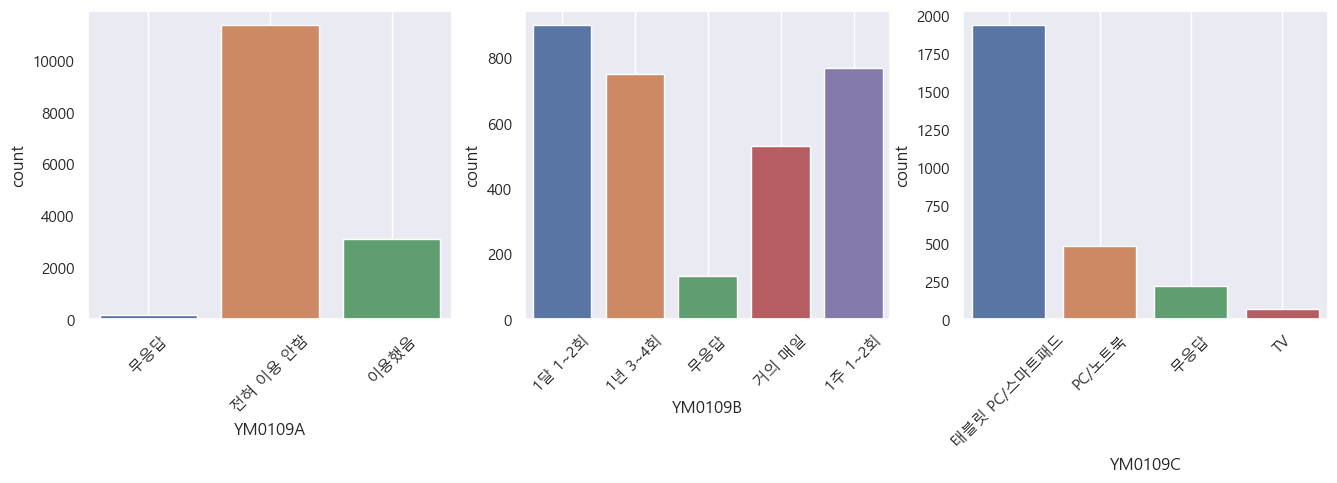

In [16]:
uni_eda_c(data1, 'YM0109A', 'YM0109B', 'YM0109C')

## ❗ 인터넷 실시간 방송 및 동영상 사이트

[ 범주별 빈도수 ]


,이용했음,전혀 이용 안함,무응답
YM0110A,13701,761,74


,거의 매일,1주 1~2회,1달 1~2회,1년 3~4회,무응답
YM0110B,11243,1897,374,101,86


,태블릿 PC/스마트패드,PC/노트북,무응답,TV
YM0110C,10701,1253,836,295



[ 범주별 비율 ]


,이용했음,전혀 이용 안함,무응답
YM0110A,0.942556,0.052353,0.005091


,거의 매일,1주 1~2회,1달 1~2회,1년 3~4회,무응답
YM0110B,0.773459,0.130504,0.025729,0.006948,0.005916


,태블릿 PC/스마트패드,PC/노트북,무응답,TV
YM0110C,0.736172,0.0862,0.057512,0.020294



[ Bar Chart ]


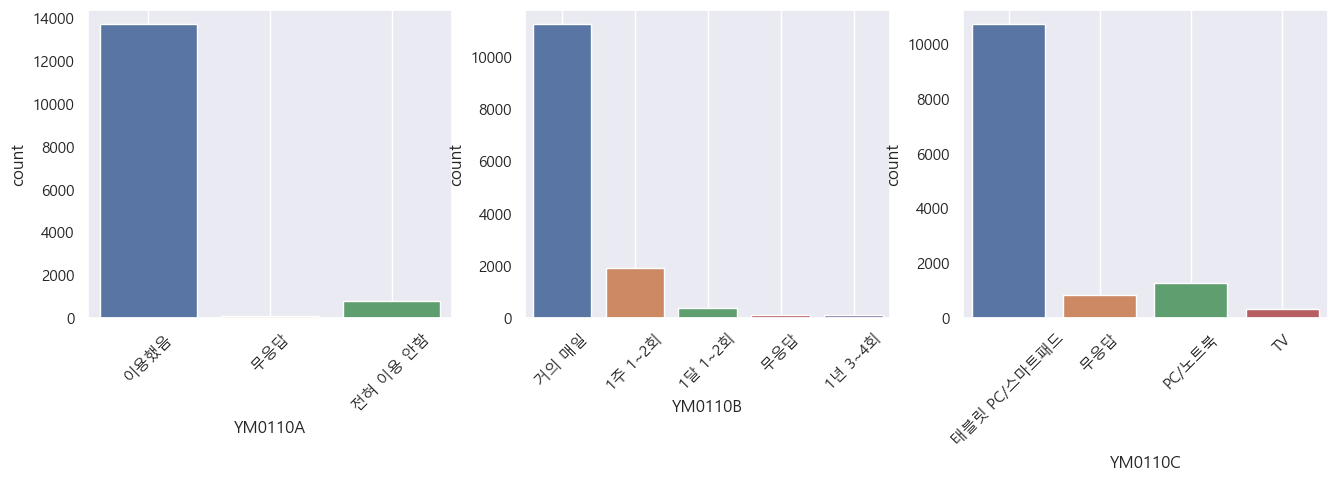

In [17]:
uni_eda_c(data1, 'YM0110A', 'YM0110B', 'YM0110C')

## ❗ 인터넷/모바일 메신저

[ 범주별 빈도수 ]


,이용했음,전혀 이용 안함,무응답
YM0111A,13601,861,74


,거의 매일,1주 1~2회,1달 1~2회,1년 3~4회,무응답
YM0111B,11763,1385,296,80,77


,태블릿 PC/스마트패드,PC/노트북,무응답,TV
YM0111C,11720,866,812,42



[ 범주별 비율 ]


,이용했음,전혀 이용 안함,무응답
YM0111A,0.935677,0.059232,0.005091


,거의 매일,1주 1~2회,1달 1~2회,1년 3~4회,무응답
YM0111B,0.809232,0.095281,0.020363,0.005504,0.005297


,태블릿 PC/스마트패드,PC/노트북,무응답,TV
YM0111C,0.806274,0.059576,0.055861,0.002889



[ Bar Chart ]


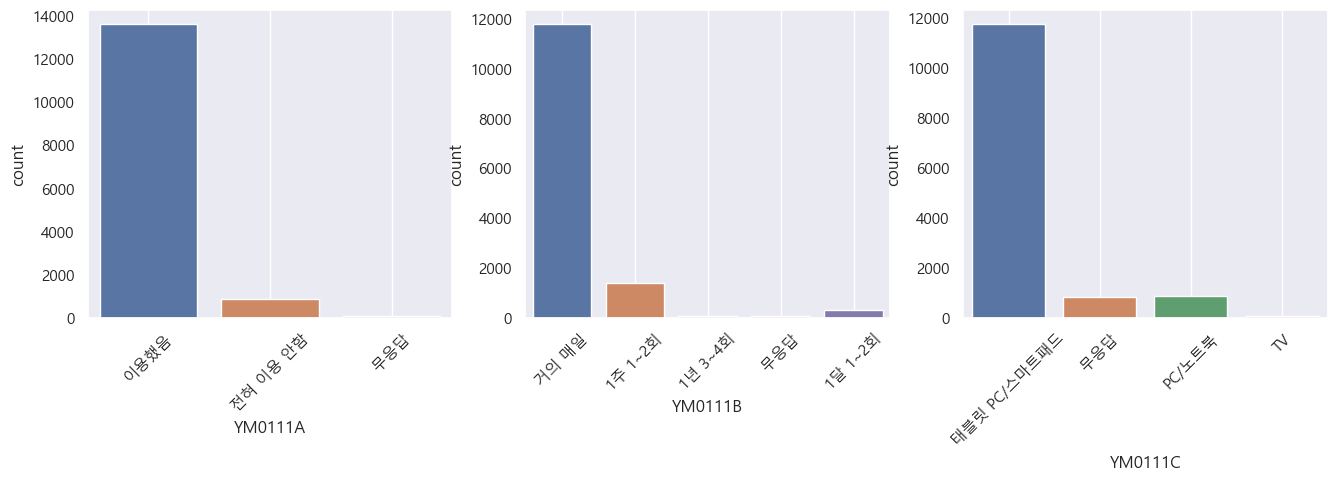

In [18]:
uni_eda_c(data1, 'YM0111A', 'YM0111B', 'YM0111C')

## ❗ 인터넷 소셜네트워크서비스

[ 범주별 빈도수 ]


,이용했음,전혀 이용 안함,무응답
YM0112A,10785,3675,76


,거의 매일,1주 1~2회,1달 1~2회,1년 3~4회,무응답
YM0112B,7776,1829,755,330,95


,태블릿 PC/스마트패드,무응답,PC/노트북,TV
YM0112C,9579,534,485,21



[ 범주별 비율 ]


,이용했음,전혀 이용 안함,무응답
YM0112A,0.741951,0.252821,0.005228


,거의 매일,1주 1~2회,1달 1~2회,1년 3~4회,무응답
YM0112B,0.534948,0.125826,0.05194,0.022702,0.006535


,태블릿 PC/스마트패드,무응답,PC/노트북,TV
YM0112C,0.658985,0.036736,0.033365,0.001445



[ Bar Chart ]


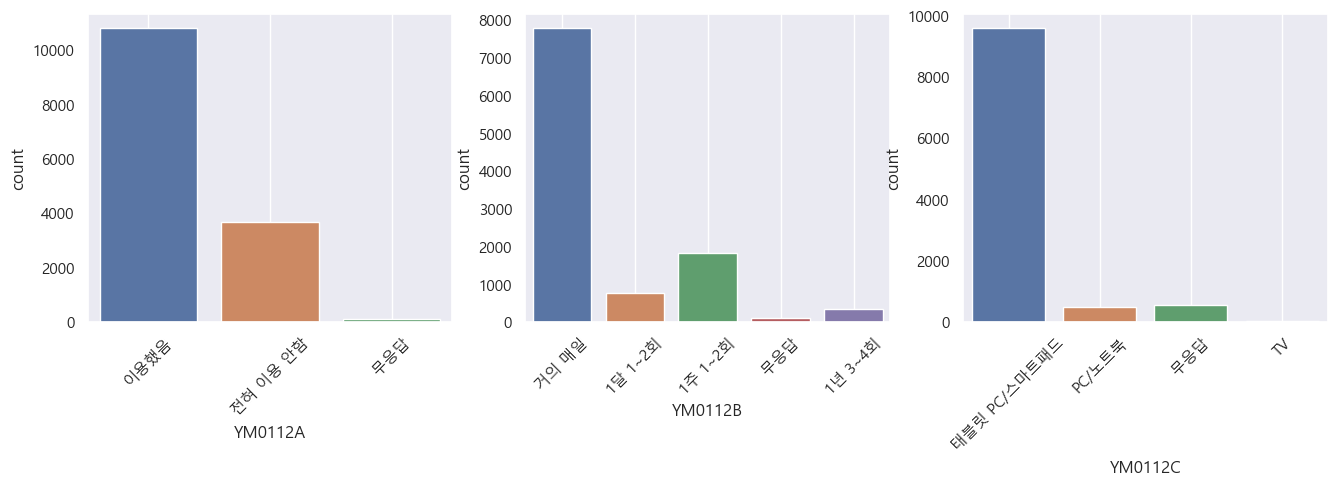

In [19]:
uni_eda_c(data1, 'YM0112A', 'YM0112B', 'YM0112C')

## ❗ 파일 다운로드 사이트

[ 범주별 빈도수 ]


,전혀 이용 안함,이용했음,무응답
YM0113A,10657,3788,91


,1달 1~2회,1년 3~4회,1주 1~2회,거의 매일,무응답
YM0113B,1459,960,947,329,93


,태블릿 PC/스마트패드,PC/노트북,무응답,TV
YM0113C,2317,1120,195,30



[ 범주별 비율 ]


,전혀 이용 안함,이용했음,무응답
YM0113A,0.733145,0.260594,0.00626


,1달 1~2회,1년 3~4회,1주 1~2회,거의 매일,무응답
YM0113B,0.100371,0.066043,0.065149,0.022633,0.006398


,태블릿 PC/스마트패드,PC/노트북,무응답,TV
YM0113C,0.159397,0.07705,0.013415,0.002064



[ Bar Chart ]


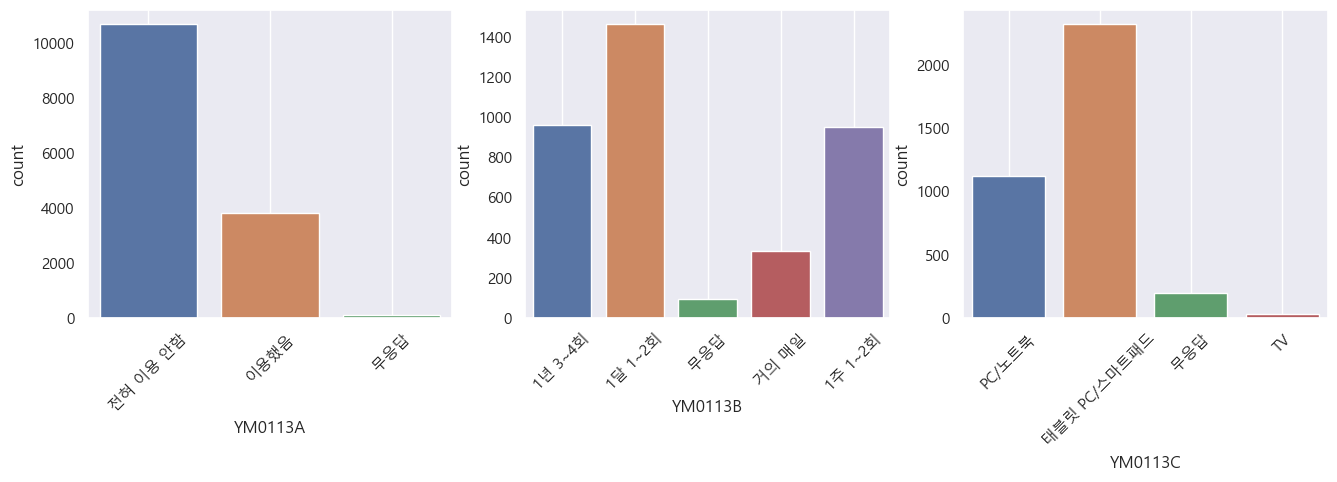

In [20]:
uni_eda_c(data1, 'YM0113A', 'YM0113B', 'YM0113C')

## ❕ 매체 이용

In [21]:
def get_series(data, target, name):
    tmp = pd.DataFrame(data.loc[data[target].isin([1, 2]), target])
    tmp.rename(columns={target:'response'}, inplace=True)
    tmp['type'] = name
    return tmp

In [23]:
tmp1 = get_series(data, 'YM0101A', '지상파TV방송')
tmp2 = get_series(data, 'YM0102A', '지상파를 제외한 TV 방송')
tmp3 = get_series(data, 'YM0103A', 'OTT')
tmp4 = get_series(data, 'YM0104A', '종이 신문')
tmp5 = get_series(data, 'YM0105A', '종이 만화책')
tmp6 = get_series(data, 'YM0106A', '종이 잡지 또는 책')
tmp7 = get_series(data, 'YM0107A', '인터넷 신문')
tmp8 = get_series(data, 'YM0108A', '인터넷 만화(웹툰)')
tmp9 = get_series(data, 'YM0109A', '인터넷 잡지 및 전자책')
tmp10 = get_series(data, 'YM0110A', '인터넷 실시간 방송 및 동영상 사이트')
tmp11 = get_series(data, 'YM0111A', '인터넷/모바일 메신저')
tmp12 = get_series(data, 'YM0112A', '인터넷 소셜네트워크서비스')
tmp13 = get_series(data, 'YM0113A', '파일 다운로드 사이트')

tmp0 = pd.concat([tmp1, tmp2, tmp3, tmp4, tmp5, tmp6, tmp7, tmp8, tmp9, tmp10, tmp11, tmp12, tmp13], axis=0)

In [24]:
tmp0

,response,type
1,2,지상파TV방송
2,1,지상파TV방송
3,1,지상파TV방송
4,1,지상파TV방송
5,1,지상파TV방송
...,...,...
14532,2,파일 다운로드 사이트
14533,2,파일 다운로드 사이트
14534,1,파일 다운로드 사이트
14535,2,파일 다운로드 사이트


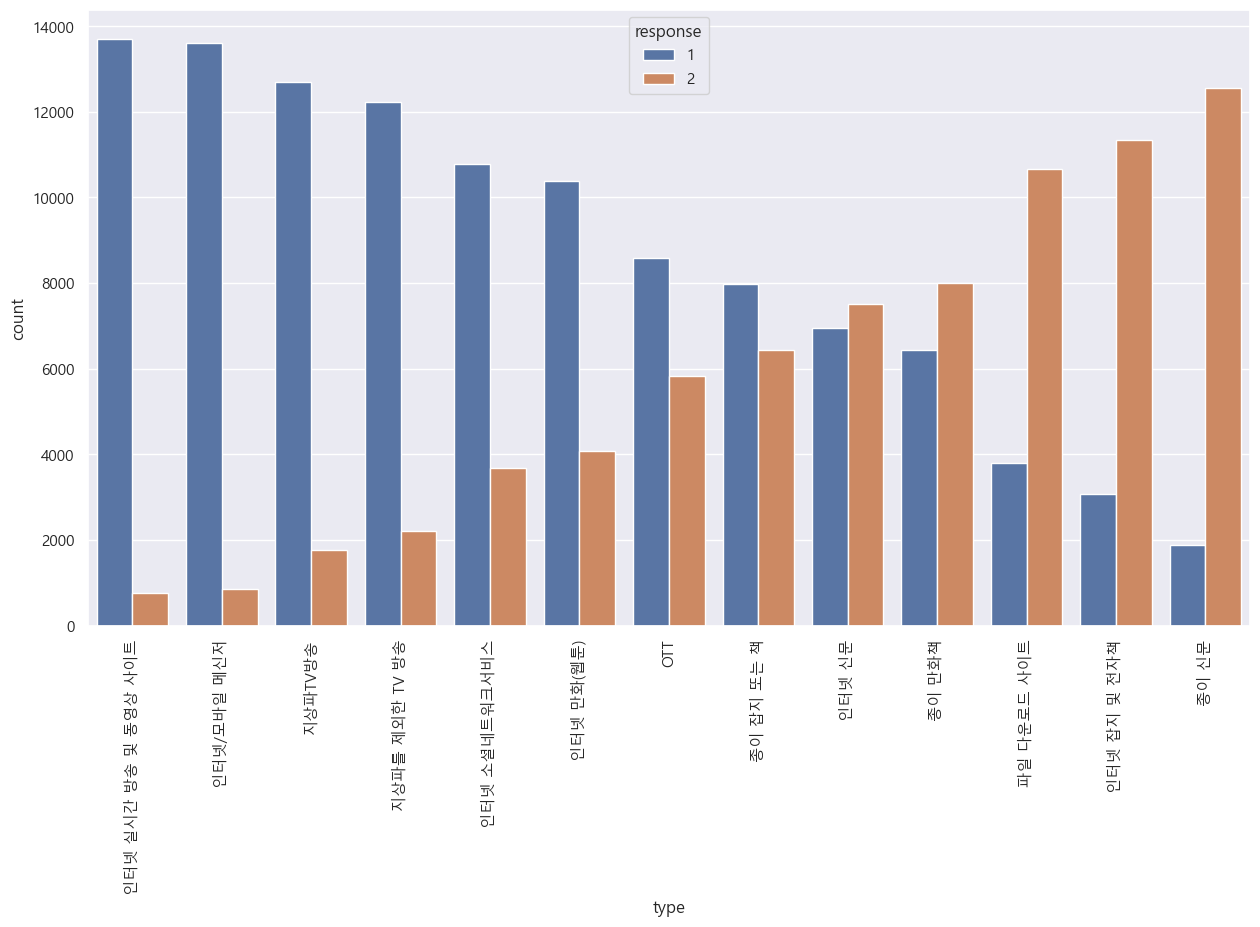

In [25]:
plt.figure(figsize=(15, 8))
response_counts = tmp0.groupby(['type'])['response'].value_counts().unstack().fillna(0)
response_counts = response_counts.loc[:, 1].sort_values(ascending=False)

# 정렬된 결과로 시각화
sns.countplot(data=tmp0, x='type', hue='response', order=response_counts.index)
plt.xticks(rotation=90)
plt.show()
# 1: 있다 2: 없다

# 💛유해 차단 프로그램 사용 여부

## ❗ 우리 집 데스크탑 PC, 노트북

In [26]:
def uni_eda_c2(data, target1, target2):
    map_dict1 = {1: '한다', 2: '안한다', 8: '응답', 9:'무응답'}
    map_dict2 = {1: '설치되어 있음', 2: '설치되어 있지 않음', 3: '설치되어 있는지 잘 모르겠음', 9: '무응답'}
    
    data[target1] = data[target1].map(map_dict1)
    data[target2] = data[target2].map(map_dict2)
    
    print('[ 범주별 빈도수 ]')
    display(pd.DataFrame(data[target1].value_counts()).T)
    display(pd.DataFrame(data[target2].value_counts()).T)
    print()
    print('[ 범주별 비율 ]')
    display(pd.DataFrame(data[target1].value_counts()/data.shape[0]).T)
    display(pd.DataFrame(data[target2].value_counts()/data.shape[0]).T)
    print()
    print('[ Bar Chart ]')
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(x=data[target1])
    plt.grid()
    plt.xticks(rotation=45)
    plt.subplot(1, 2, 2)
    sns.countplot(x=data[target2])
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

In [27]:
uni_eda_c3(data1, 'YM0601')

NameError: name 'uni_eda_c3' is not defined

## ❗ 우리 집 태블릿 PC/스마트패드

[ 범주별 빈도수 ]


,안한다,한다,무응답
YM0602,8409,5979,148


,설치되어 있는지 잘 모르겠음,설치되어 있지 않음,설치되어 있음,무응답
YM06_102,2249,2217,1424,89



[ 범주별 비율 ]


,안한다,한다,무응답
YM0602,0.578495,0.411324,0.010182


,설치되어 있는지 잘 모르겠음,설치되어 있지 않음,설치되어 있음,무응답
YM06_102,0.154719,0.152518,0.097964,0.006123



[ Bar Chart ]


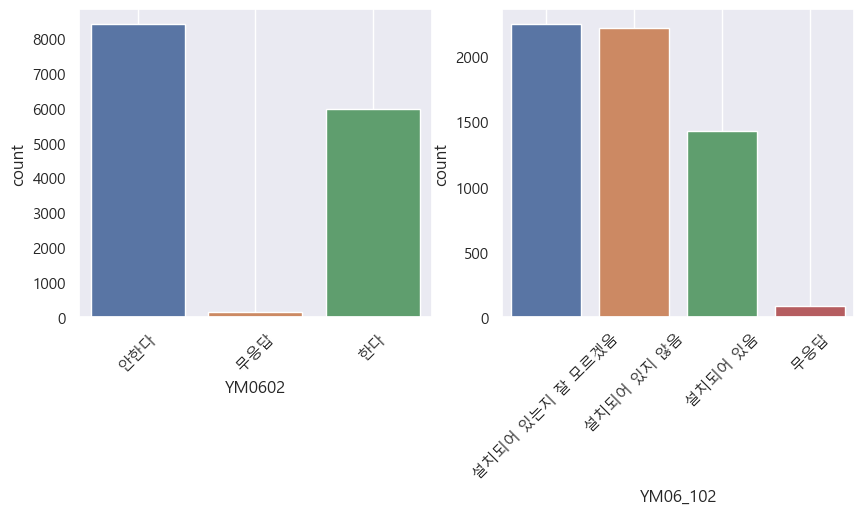

In [28]:
uni_eda_c2(data1, 'YM0602', 'YM06_102')

## ❗ 학교 데스크탑 PC, 노트북, 태블릿 PC/스마트패드

[ 범주별 빈도수 ]


,안한다,한다,무응답
YM0603,8302,6038,196


,설치되어 있는지 잘 모르겠음,설치되어 있음,설치되어 있지 않음,무응답
YM06_103,2988,2095,829,126



[ 범주별 비율 ]


,안한다,한다,무응답
YM0603,0.571134,0.415382,0.013484


,설치되어 있는지 잘 모르겠음,설치되어 있음,설치되어 있지 않음,무응답
YM06_103,0.205559,0.144125,0.057031,0.008668



[ Bar Chart ]


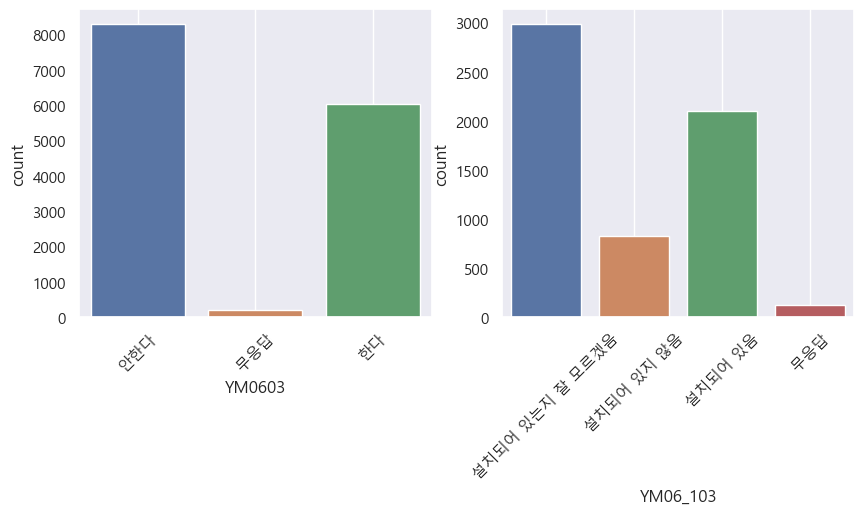

In [29]:
uni_eda_c2(data1, 'YM0603', 'YM06_103')

## ❗ 스마트폰

[ 범주별 빈도수 ]


,한다,안한다,무응답
YM0604,10706,3710,120


,설치되어 있지 않음,설치되어 있음,설치되어 있는지 잘 모르겠음,무응답
YM06_104,4027,3252,3244,183



[ 범주별 비율 ]


,한다,안한다,무응답
YM0604,0.736516,0.255228,0.008255


,설치되어 있지 않음,설치되어 있음,설치되어 있는지 잘 모르겠음,무응답
YM06_104,0.277036,0.22372,0.22317,0.012589



[ Bar Chart ]


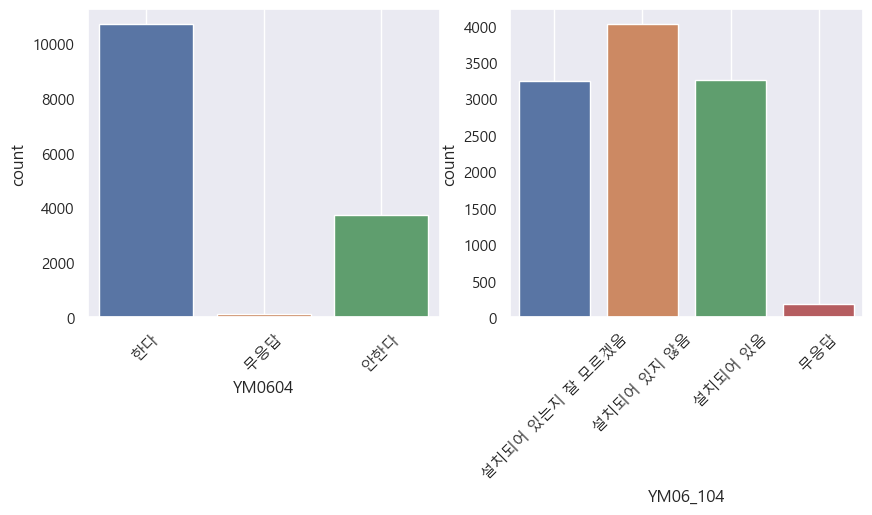

In [30]:
uni_eda_c2(data1, 'YM0604', 'YM06_104')

# 💛 매체 이용 (전체기준..?) ⇒ 위의 데이터와 동일

[ 범주별 빈도수 ]


,1주 1~2회,거의 매일,1달 1~2회,1년 3~4회,무응답
AYM0101B,5603,4753,1726,493,125



[ 범주별 비율 ]


,1주 1~2회,거의 매일,1달 1~2회,1년 3~4회,무응답
AYM0101B,0.385457,0.326981,0.11874,0.033916,0.008599



[ Bar Chart ]


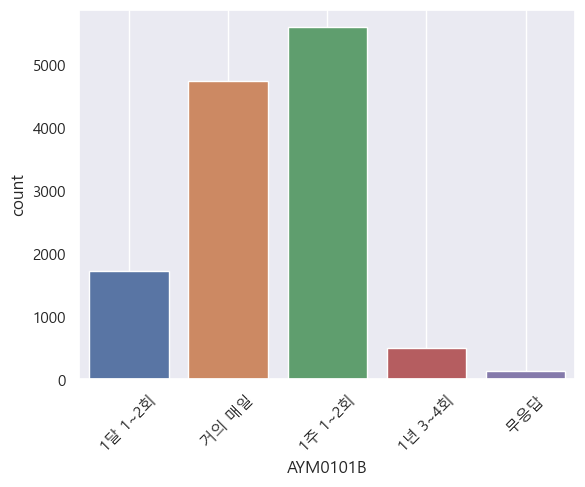

In [31]:
# 단변량 분석 (범주형 데이터)
# 범주별 빈도수, 범주별 비율, barchart
def uni_eda_c3(data, target):
    map_dict = {1: '거의 매일', 2: '1주 1~2회', 3: '1달 1~2회', 4: '1년 3~4회', 9: '무응답'}
    data[target] = data[target].map(map_dict)
    
    print('[ 범주별 빈도수 ]')
    display(pd.DataFrame(data[target].value_counts()).T)
    print()
    print('[ 범주별 비율 ]')
    display(pd.DataFrame(data[target].value_counts()/data.shape[0]).T)
    print()
    print('[ Bar Chart ]')
    sns.countplot(x=data[target])
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

uni_eda_c3(data1, 'AYM0101B')

# 💛 유해매체 이용 경험

In [32]:
data1['AYM02_101'].value_counts()

878    9304
2      3116
1      1951
9       165
Name: AYM02_101, dtype: int64

In [33]:
data1['AYM02_102'].value_counts()

878    9304
1      3535
2      1505
9       192
Name: AYM02_102, dtype: int64

In [34]:
data1['AYM02_103'].value_counts()

878    9304
1      2516
2      2492
9       224
Name: AYM02_103, dtype: int64

In [35]:
# harm_ex = pd.DataFrame(columns=)

In [36]:
# harm_ex = 
tmp = pd.DataFrame(data.loc[data1['AYM02_101'].isin([1, 2]), 'AYM02_101'])

In [37]:
tmp.rename(columns={'AYM02_101':'response'}, inplace=True)
tmp['type'] = 'TV방송'
tmp

,response,type
2,1,TV방송
14,2,TV방송
16,1,TV방송
17,1,TV방송
18,2,TV방송
...,...,...
14532,1,TV방송
14533,2,TV방송
14534,1,TV방송
14535,2,TV방송


In [38]:
tmp

,response,type
2,1,TV방송
14,2,TV방송
16,1,TV방송
17,1,TV방송
18,2,TV방송
...,...,...
14532,1,TV방송
14533,2,TV방송
14534,1,TV방송
14535,2,TV방송


In [39]:
def get_series(data, target, name):
    tmp = pd.DataFrame(data.loc[data[target].isin([1, 2]), target])
    tmp.rename(columns={target:'response'}, inplace=True)
    tmp['type'] = name
    return tmp

In [40]:
tmp1 = get_series(data, 'AYM02_101', 'TV방송')
tmp2 = get_series(data, 'AYM02_102', '인터넷 포털사이트')
tmp3 = get_series(data, 'AYM02_103', '인터넷 개인 방송 및 동영상 사이트')
tmp4 = get_series(data, 'AYM02_104', '인터넷/모바일 메신저')
tmp5 = get_series(data, 'AYM02_105', '인터넷 소셜네트워크서비스')
tmp6 = get_series(data, 'AYM02_106', '파일 다운로드 사이트')
tmp7 = get_series(data, 'AYM02_107', '스마트폰 앱')
tmp8 = get_series(data, 'AYM03_101', '(신문) 종이 신문')
tmp9 = get_series(data, 'AYM03_102', '(신문) 인터넷 신문')
tmp10 = get_series(data, 'AYM03_103', '(잡지) 종이 잡지')
tmp11 = get_series(data, 'AYM03_104', '(잡지) 인터넷 잡지')
tmp12 = get_series(data, 'AYM03_105', '(만화책) 종이 만화책')
tmp13 = get_series(data, 'AYM03_106', '(만화책) 인터넷 만화(웹툰)')
tmp14 = get_series(data, 'AYM03_107', '(사진집) 종이 사진집(화보집)')
tmp15 = get_series(data, 'AYM03_108', '(사진집) 전자 사진집(화보집)')
tmp16 = get_series(data, 'AYM03_109', '(소설책) 책')
tmp17 = get_series(data, 'AYM03_110', '(소설책) 인터넷 소설(웹소설, 팬픽 등)')
tmp18 = get_series(data, 'AYM03_111', '(소설책) 전자책(E-book)')

tmp = pd.concat([tmp1, tmp2, tmp3, tmp4, tmp5, tmp6, tmp7, tmp8, tmp9, tmp10, tmp11, tmp12, tmp13, tmp14, tmp15, tmp16, tmp17, tmp18], axis=0)

In [41]:
tmp

,response,type
2,1,TV방송
14,2,TV방송
16,1,TV방송
17,1,TV방송
18,2,TV방송
...,...,...
14520,2,(소설책) 전자책(E-book)
14524,1,(소설책) 전자책(E-book)
14525,2,(소설책) 전자책(E-book)
14531,2,(소설책) 전자책(E-book)


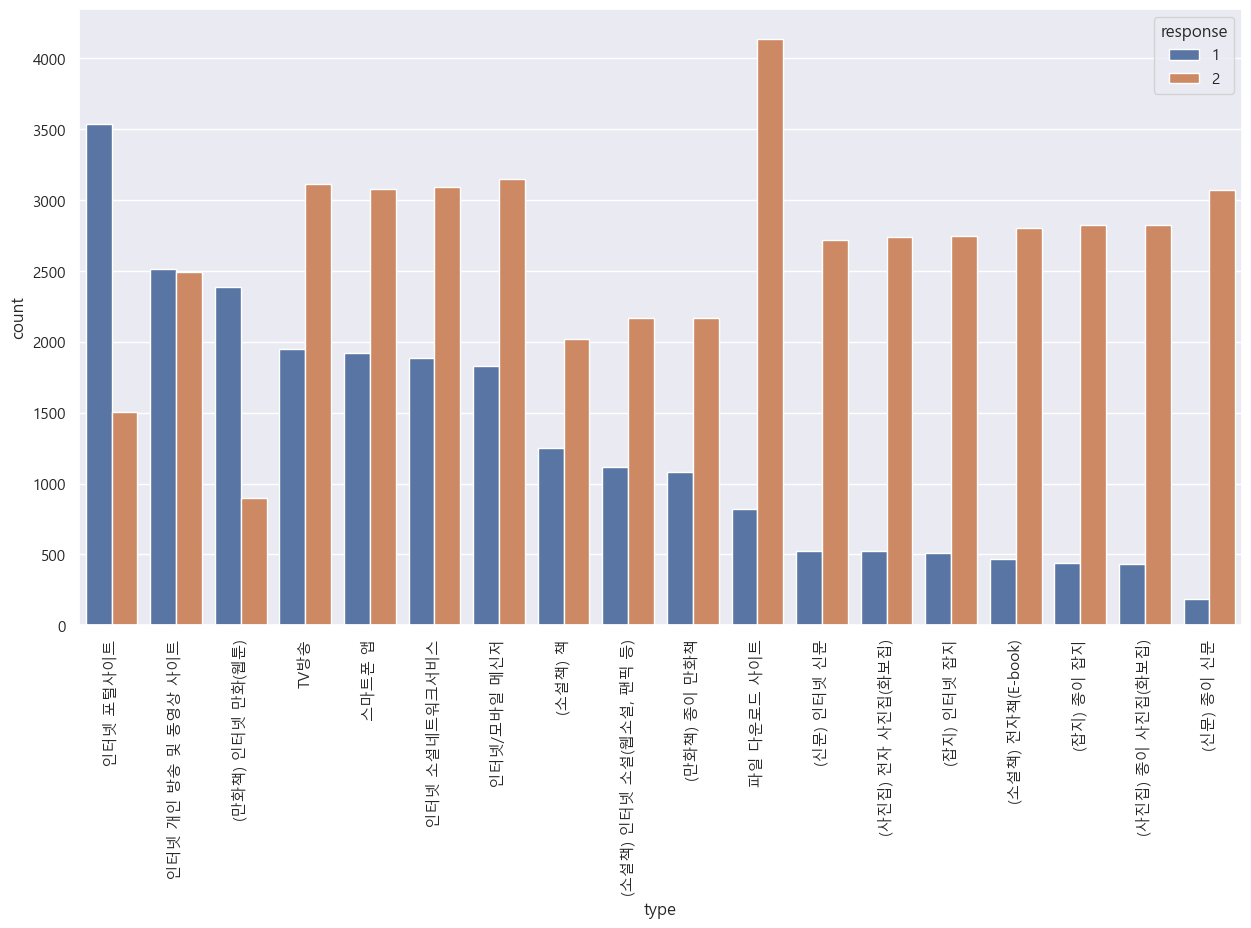

In [42]:
plt.figure(figsize=(15, 8))
response_counts = tmp.groupby(['type'])['response'].value_counts().unstack().fillna(0)
response_counts = response_counts.loc[:, 1].sort_values(ascending=False)

# 정렬된 결과로 시각화
sns.countplot(data=tmp, x='type', hue='response', order=response_counts.index)
plt.xticks(rotation=90)
plt.show()
# 1: 있다 2: 없다

[ 범주별 빈도수 ]


,1주 1~2회 정도,거의 매일,"주말, 공휴일에만",1달 1~2회 정도,무응답
AYM07_1,2260,1707,1455,1370,84



[ 범주별 비율 ]


,1주 1~2회 정도,거의 매일,"주말, 공휴일에만",1달 1~2회 정도,무응답
AYM07_1,0.155476,0.117433,0.100096,0.094249,0.005779



[ Bar Chart ]


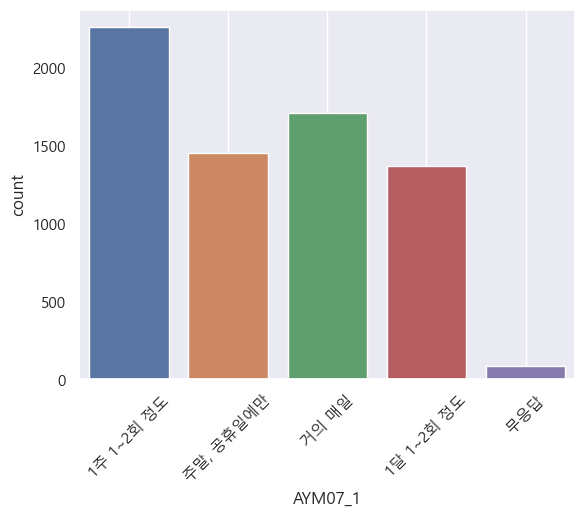

In [43]:
# 단변량 분석 (범주형 데이터)
# 범주별 빈도수, 범주별 비율, barchart
def uni_eda_c3(data, target):
    map_dict = {1: '거의 매일', 2: '1주 1~2회 정도', 3: '1달 1~2회 정도', 4: '주말, 공휴일에만', 9: '무응답'}
    data[target] = data[target].map(map_dict)
    
    print('[ 범주별 빈도수 ]')
    display(pd.DataFrame(data[target].value_counts()).T)
    print()
    print('[ 범주별 비율 ]')
    display(pd.DataFrame(data[target].value_counts()/data.shape[0]).T)
    print()
    print('[ Bar Chart ]')
    sns.countplot(x=data[target])
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

uni_eda_c3(data1, 'AYM07_1')

[ 범주별 빈도수 ]


,스마트폰,"PC(데스크탑, 노트북)","태블릿 PC/스마트패드(아이패드, 갤럭시탭 등)",무응답,"콘솔기기(플레이스테이션, X-Box, 닌텐도 등)"
AYM07_2,4456,2041,207,92,80



[ 범주별 비율 ]


,스마트폰,"PC(데스크탑, 노트북)","태블릿 PC/스마트패드(아이패드, 갤럭시탭 등)",무응답,"콘솔기기(플레이스테이션, X-Box, 닌텐도 등)"
AYM07_2,0.306549,0.14041,0.014241,0.006329,0.005504



[ Bar Chart ]


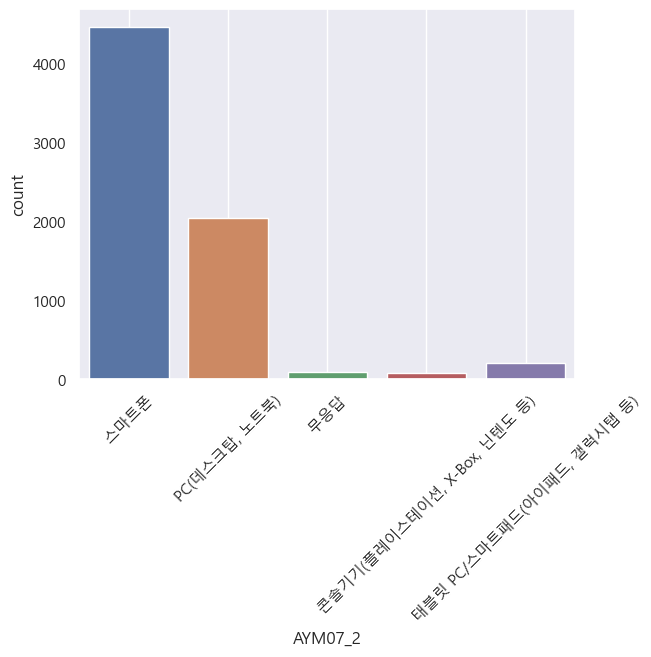

In [44]:
# 단변량 분석 (범주형 데이터)
# 범주별 빈도수, 범주별 비율, barchart
def uni_eda_c3(data, target):
    map_dict = {1: 'PC(데스크탑, 노트북)', 2: '스마트폰', 3: '태블릿 PC/스마트패드(아이패드, 갤럭시탭 등)', 4: '콘솔기기(플레이스테이션, X-Box, 닌텐도 등)', 9: '무응답'}
    data[target] = data[target].map(map_dict)
    
    print('[ 범주별 빈도수 ]')
    display(pd.DataFrame(data[target].value_counts()).T)
    print()
    print('[ 범주별 비율 ]')
    display(pd.DataFrame(data[target].value_counts()/data.shape[0]).T)
    print()
    print('[ Bar Chart ]')
    sns.countplot(x=data[target])
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

uni_eda_c3(data1, 'AYM07_2')

# 230421 데이터분석

- 매체 이용여부/빈도/주이용기기 1~13
    - 매체 이용여부, 빈도, 주 이용기기 (전체기준)
    - 매체 이용여부, 빈도, 주 이용기기 (초중고 기준)
    - 매체 이용여부, 빈도, 주 이용기기 (남녀 기준)
- 매체 사용 여부 / 유해 차단 프로그램 설치 여부
    - 매체 사용 여부 / 유해 차단 프로그램 설치 여부 (전체기준)
    - 매체 사용 여부 / 유해 차단 프로그램 설치 여부 (초중고 기준)
    - 매체 사용 여부 / 유해 차단 프로그램 설치 여부 (남녀 기준)
- 성인 컨텐츠 이용경험/나이확인 (두개 있으니까 합쳐서!)
    - 성인 컨텐츠 이용경험(전체기준)
    - 성인 컨텐츠 이용경험(초중고 기준)
    - 성인 컨텐츠 이용경험(남녀 기준)
    - 성인 컨텐츠 나이확인(전체기준)

In [45]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [46]:
data_raw = pd.read_excel('청소년 매체이용 및 유해환경 실태조사.xlsx')
data_raw.drop(0, axis=0, inplace=True)

In [47]:
data = data_raw.copy()

# 💙 매체 이용여부 / 빈도

## ❕ 매체 이용 여부 : 전체

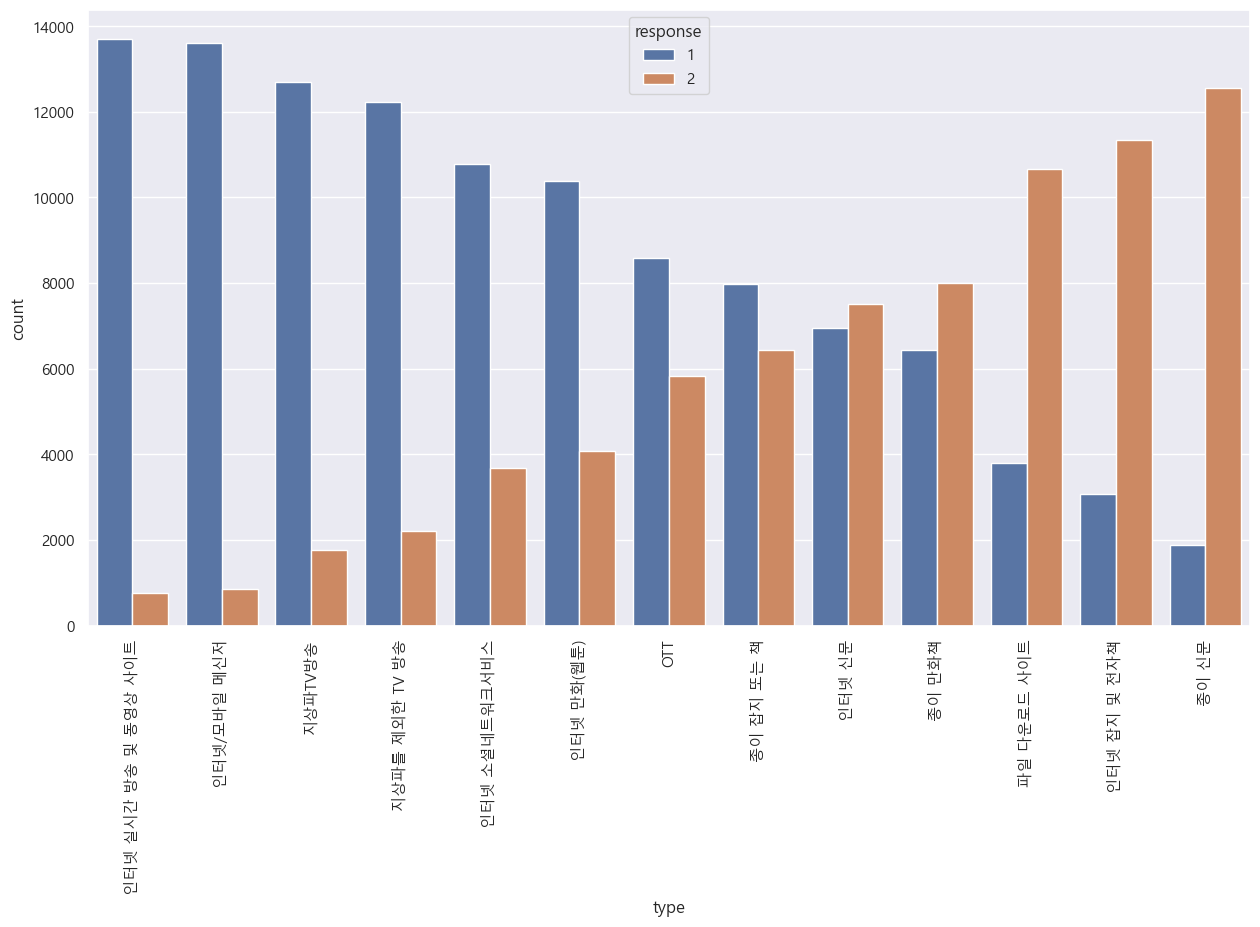

In [48]:
def get_series(data, target, name):
    tmp = pd.DataFrame(data.loc[data[target].isin([1, 2]), target])
    tmp.rename(columns={target:'response'}, inplace=True)
    tmp['type'] = name
    return tmp

tmp1 = get_series(data, 'YM0101A', '지상파TV방송')
tmp2 = get_series(data, 'YM0102A', '지상파를 제외한 TV 방송')
tmp3 = get_series(data, 'YM0103A', 'OTT')
tmp4 = get_series(data, 'YM0104A', '종이 신문')
tmp5 = get_series(data, 'YM0105A', '종이 만화책')
tmp6 = get_series(data, 'YM0106A', '종이 잡지 또는 책')
tmp7 = get_series(data, 'YM0107A', '인터넷 신문')
tmp8 = get_series(data, 'YM0108A', '인터넷 만화(웹툰)')
tmp9 = get_series(data, 'YM0109A', '인터넷 잡지 및 전자책')
tmp10 = get_series(data, 'YM0110A', '인터넷 실시간 방송 및 동영상 사이트')
tmp11 = get_series(data, 'YM0111A', '인터넷/모바일 메신저')
tmp12 = get_series(data, 'YM0112A', '인터넷 소셜네트워크서비스')
tmp13 = get_series(data, 'YM0113A', '파일 다운로드 사이트')

tmp0 = pd.concat([tmp1, tmp2, tmp3, tmp4, tmp5, tmp6, tmp7, tmp8, tmp9, tmp10, tmp11, tmp12, tmp13], axis=0)

plt.figure(figsize=(15, 8))
response_counts = tmp0.groupby(['type'])['response'].value_counts().unstack().fillna(0)
response_counts = response_counts.loc[:, 1].sort_values(ascending=False)

# 정렬된 결과로 시각화
sns.countplot(data=tmp0, x='type', hue='response', order=response_counts.index)
plt.xticks(rotation=90)
plt.show()
# 1: 있다 2: 없다

In [49]:
tmp0

,response,type
1,2,지상파TV방송
2,1,지상파TV방송
3,1,지상파TV방송
4,1,지상파TV방송
5,1,지상파TV방송
...,...,...
14532,2,파일 다운로드 사이트
14533,2,파일 다운로드 사이트
14534,1,파일 다운로드 사이트
14535,2,파일 다운로드 사이트


## ❕ 매체 이용 여부 : 초중고 별 (1)

DM3 : 학교급, DM6 : 학년별

1 : 이용했음, 2 : 전혀 이용 안함 <br/>
⏩ (차트 그리기 편하도록) <br/# 막대그래프 그리기
ax = sns.barplot(data=grouped_df, x='학교급', y='피해경험', label='피해경험', color='orange')
ax = sns.barplot(data=grouped_df, x='학교급', y='가해경험', bottom=grouped_df['피해경험'], label='가해경험',color = 'darkblue')
ax = sns.barplot(data=grouped_df, x='학교급', y='목격경험', bottom=grouped_df['피해경험'] + grouped_df['가해경험'], label='목격경험', color = 'green')

ax.legend()

ax.set(xlabel='학교급', ylabel='경험 횟수')

plt.show()>
1 : 이용했음, 0 : 전혀 이용 안함

In [50]:
data['YM0101A']

1        2
2        1
3        1
4        1
5        1
        ..
14532    1
14533    1
14534    1
14535    1
14536    1
Name: YM0101A, Length: 14536, dtype: object

In [51]:
my_columns = ['YM0101A', 'YM0102A', 'YM0103A', 'YM0104A', 'YM0105A', 'YM0106A', 'YM0107A', 'YM0108A', 'YM0109A', 'YM0110A', 'YM0111A', 'YM0112A', 'YM0113A']
replace_dict = {}
for col in my_columns:
    replace_dict[col] = {2 : 0}
print(replace_dict)

{'YM0101A': {2: 0}, 'YM0102A': {2: 0}, 'YM0103A': {2: 0}, 'YM0104A': {2: 0}, 'YM0105A': {2: 0}, 'YM0106A': {2: 0}, 'YM0107A': {2: 0}, 'YM0108A': {2: 0}, 'YM0109A': {2: 0}, 'YM0110A': {2: 0}, 'YM0111A': {2: 0}, 'YM0112A': {2: 0}, 'YM0113A': {2: 0}}


In [52]:
my_columns = ['YM0101A', 'YM0102A', 'YM0103A', 'YM0104A', 'YM0105A', 'YM0106A', 'YM0107A', 'YM0108A', 'YM0109A', 'YM0110A', 'YM0111A', 'YM0112A', 'YM0113A']
data = data.replace(replace_dict)
data['YM0101A']

1        0
2        1
3        1
4        1
5        1
        ..
14532    1
14533    1
14534    1
14535    1
14536    1
Name: YM0101A, Length: 14536, dtype: int64

In [53]:
groupby_dict = {}
for col in my_columns:
    groupby_dict[col] = 'sum'
print(groupby_dict)

{'YM0101A': 'sum', 'YM0102A': 'sum', 'YM0103A': 'sum', 'YM0104A': 'sum', 'YM0105A': 'sum', 'YM0106A': 'sum', 'YM0107A': 'sum', 'YM0108A': 'sum', 'YM0109A': 'sum', 'YM0110A': 'sum', 'YM0111A': 'sum', 'YM0112A': 'sum', 'YM0113A': 'sum'}


In [54]:
map_dict = {1: '초등학교', 2: '중학교', 3: '고등학교'}
data['DM3'] = data['DM3'].map(map_dict)

In [55]:
grouped_df = data.groupby('DM3').agg(groupby_dict).reset_index()
grouped_df

,DM3,YM0101A,YM0102A,YM0103A,YM0104A,YM0105A,YM0106A,YM0107A,YM0108A,YM0109A,YM0110A,YM0111A,YM0112A,YM0113A
0,고등학교,4775,4770,3549,753,1636,2864,3317,4367,1391,5332,5408,4992,1735
1,중학교,4092,4049,2928,659,2020,2544,2320,3595,1139,4421,4458,3892,1464
2,초등학교,4481,4307,3225,1401,3687,3586,2047,2979,1642,4614,4401,2585,1408


- 0 지상파TV
- 1 케이블TV
- 2 OTT
- 3 종이신문
- 4 종이만화책
- 5 종이잡지/책
- 6 인터넷신문
- 7 웹툰
- 8 인터넷잡지/전자책
- 9 스트리밍사이트
- 10 인터넷/모바일메신저
- 11 SNS
- 12 파일다운로드사이트

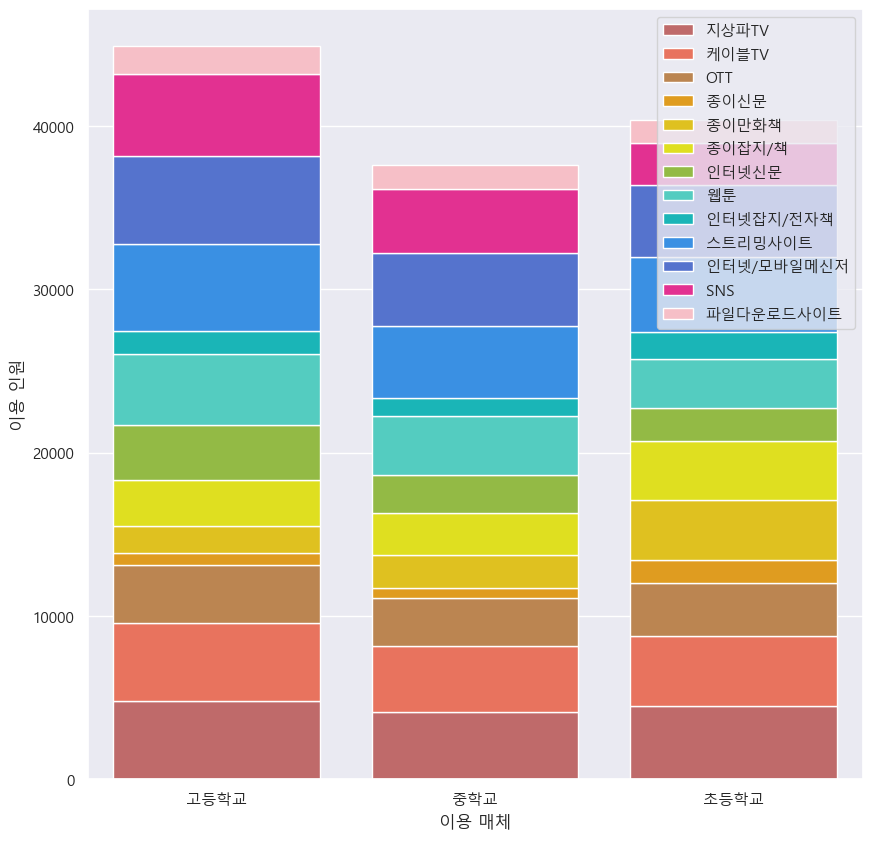

In [56]:
colors = ['indianred', 'tomato', 'peru', 'orange', 'gold', 'yellow', 'yellowgreen', 'turquoise', 'darkturquoise', 'dodgerblue', 'royalblue', 'deeppink', 'lightpink']
my_labels = ['지상파TV', '케이블TV', 'OTT', '종이신문', '종이만화책', '종이잡지/책', '인터넷신문', '웹툰', '인터넷잡지/전자책', '스트리밍사이트', '인터넷/모바일메신저', 'SNS', '파일다운로드사이트']
my_columns = ['YM0101A', 'YM0102A', 'YM0103A', 'YM0104A', 'YM0105A', 'YM0106A', 'YM0107A', 'YM0108A', 'YM0109A', 'YM0110A', 'YM0111A', 'YM0112A', 'YM0113A']
# 막대그래프를 그립니다
plt.figure(figsize=(10, 10))
ax = None  # 첫 번째 ax 객체를 초기화합니다
for i, col in enumerate(my_columns):
    ax = sns.barplot(data=grouped_df, x='DM3', y=col, bottom=grouped_df[my_columns[:i]].sum(axis=1), color=colors[i], ax=ax, label=my_labels[i])
    
# 범례와 축 레이블을 추가합니다
ax.legend()
ax.set(xlabel='이용 매체', ylabel='이용 인원')

# 그래프를 출력합니다
plt.show()

## ❕ 매체 이용 여부 : 초중고 별 (2)

In [57]:
data

,ID,ID_1,ID_2,GUBUN,S_NAME,AGREE,YM0101A,YM0101B,YM0101C,YM0102A,...,DDM2,DDM3,DDM4,DDM5,DDM6,DDM7,DDM8,DDM9,DDM10,DDM11
1,500201,1,5002,1,울산강남초,1,0,NaN,NaN,0,...,0,2,9,9,1,9,9,9,9,9
2,500202,2,5002,1,울산강남초,1,1,3,4,1,...,0,2,9,9,1,9,9,9,9,9
3,500203,3,5002,1,울산강남초,1,1,1,4,1,...,0,2,9,9,1,9,9,9,9,9
4,500204,4,5002,1,울산강남초,1,1,1,2,1,...,0,1,9,9,1,9,9,9,9,9
5,500206,6,5002,1,울산강남초,1,1,1,4,1,...,0,2,9,9,1,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14532,684021,21,6840,2,광주전자공업고,1,1,1,4,1,...,0,2,9,2,2,9,9,9,9,1
14533,684022,22,6840,2,광주전자공업고,1,1,2,2,1,...,0,2,9,2,2,9,9,9,9,1
14534,684023,23,6840,2,광주전자공업고,1,1,2,2,0,...,0,2,9,2,2,9,9,9,9,1
14535,684024,24,6840,2,광주전자공업고,1,1,2,2,1,...,0,2,9,2,2,9,9,9,9,1


In [58]:
grouped_df2 = grouped_df.T.reset_index().drop(0, axis=0).reset_index().drop('level_0', axis=1).rename(columns={'index':'매체 유형', 0: '고등학교', 1: '중학교', 2: '초등학교'})

In [59]:
grouped_df2['매체 유형'] = ['지상파TV', '케이블TV', 'OTT', '종이신문', '종이만화책', '종이잡지/책', '인터넷신문', '웹툰', '인터넷잡지/전자책', '스트리밍사이트', '인터넷/모바일메신저', 'SNS', '파일다운로드사이트']
grouped_df2

,매체 유형,고등학교,중학교,초등학교
0,지상파TV,4775,4092,4481
1,케이블TV,4770,4049,4307
2,OTT,3549,2928,3225
3,종이신문,753,659,1401
4,종이만화책,1636,2020,3687
5,종이잡지/책,2864,2544,3586
6,인터넷신문,3317,2320,2047
7,웹툰,4367,3595,2979
8,인터넷잡지/전자책,1391,1139,1642
9,스트리밍사이트,5332,4421,4614


In [60]:
grouped_df2['합계'] = grouped_df2['고등학교'] + grouped_df2['중학교'] + grouped_df2['초등학교']
grouped_df2 = grouped_df2.sort_values('합계', ascending=False).reset_index()
grouped_df2

,index,매체 유형,고등학교,중학교,초등학교,합계
0,9,스트리밍사이트,5332,4421,4614,14367
1,10,인터넷/모바일메신저,5408,4458,4401,14267
2,0,지상파TV,4775,4092,4481,13348
3,1,케이블TV,4770,4049,4307,13126
4,11,SNS,4992,3892,2585,11469
5,7,웹툰,4367,3595,2979,10941
6,2,OTT,3549,2928,3225,9702
7,5,종이잡지/책,2864,2544,3586,8994
8,6,인터넷신문,3317,2320,2047,7684
9,4,종이만화책,1636,2020,3687,7343


In [61]:
grouped_df2.drop(['index', '합계'], axis=1, inplace=True)

<Figure size 1000x500 with 0 Axes>

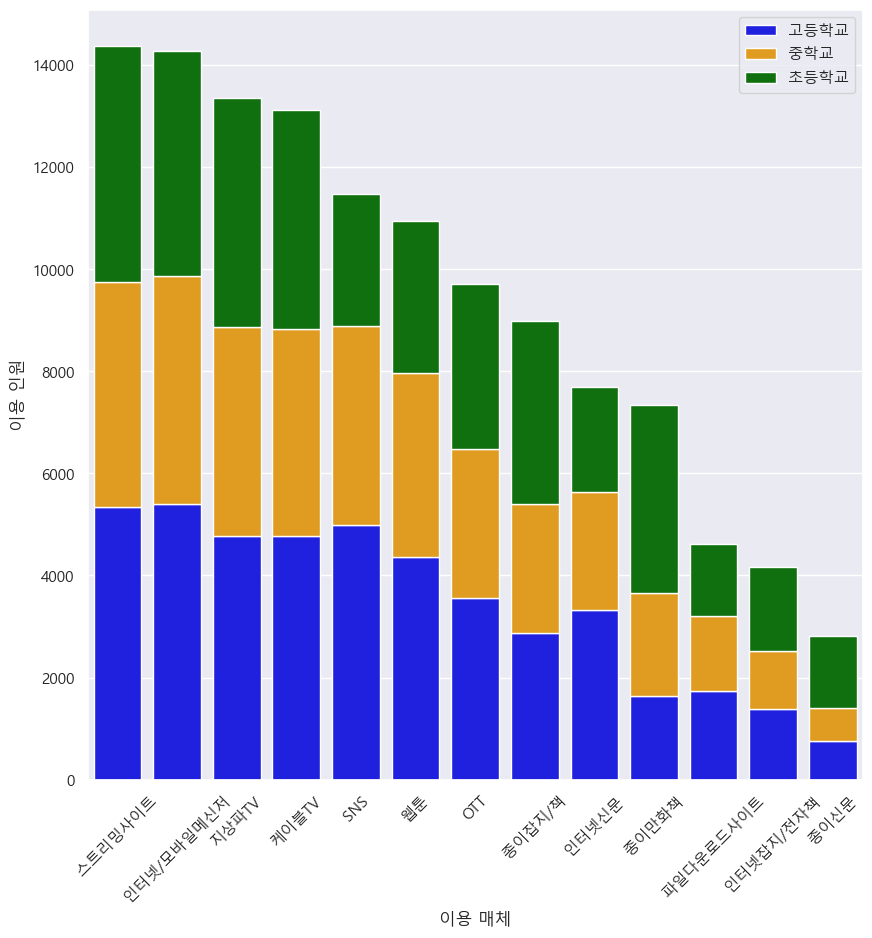

In [62]:
plt.figure(figsize=(10, 5))
colors = ['blue', 'orange', 'green']
my_labels = ['고등학교', '중학교', '초등학교']
my_columns = ['고등학교', '중학교', '초등학교']

# 정렬
sums = grouped_df2[my_columns].sum(axis=0)
sort_order = sums.sort_values(ascending=False).index


# 막대그래프를 그립니다
plt.figure(figsize=(10, 10))
ax = None  # 첫 번째 ax 객체를 초기화합니다
for i, col in enumerate(my_columns):
    ax = sns.barplot(data=grouped_df2, x='매체 유형', y=col, bottom=grouped_df2[my_columns[:i]].sum(axis=1), color=colors[i], ax=ax, label=my_labels[i])
    
# 범례와 축 레이블을 추가합니다
ax.legend()
ax.set(xlabel='이용 매체', ylabel='이용 인원')
plt.xticks(rotation=45)

# 그래프를 출력합니다
plt.show()

In [63]:
plt.figure(figsize=(10, 5))
colors = ['blue', 'orange', 'green']
my_labels = ['고등학교', '중학교', '초등학교']
my_columns = ['고등학교', '중학교', '초등학교']

# 정렬
sums = grouped_df2[my_columns].sum(axis=0)
sort_order = sums.sort_values(ascending=False).index


# 막대그래프를 그립니다
plt.figure(figsize=(10, 10))
ax = None  # 첫 번째 ax 객체를 초기화합니다
for i, col in enumerate(my_columns):
    ax = plt.pie(data=grouped_df2, x='매체 유형', y=col, bottom=grouped_df2[my_columns[:i]].sum(axis=1), color=colors[i], ax=ax, label=my_labels[i])
    
# 범례와 축 레이블을 추가합니다
ax.legend()
ax.set(xlabel='이용 매체', ylabel='이용 인원')
plt.xticks(rotation=45)

# 그래프를 출력합니다
plt.show()

TypeError: pie() got an unexpected keyword argument 'y'

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

## ❕ 매체 이용 여부 : 남녀 별

In [64]:
def get_grouped_df(cols, re_dict, ma_dict, ma_col, type_name, re_names, real_type_names):

    replace_dict = {}
    for col in cols:
        replace_dict[col] = re_dict
    
    # make groupby_df
    groupby_dict = {}
    for col in cols:
        groupby_dict[col] = 'sum'
    data[ma_col] = data[ma_col].map(ma_dict)
    grouped_df = data.groupby(ma_col).agg(groupby_dict).reset_index()
    
    grouped_df2 = grouped_df.T.reset_index().drop(0, axis=0).reset_index().drop('level_0', axis=1).rename(columns=re_names)
    grouped_df2[type_name] = real_type_names
    
    
    grouped_df2['합계'] = grouped_df2['남자'] + grouped_df2['여자']
    grouped_df2 = grouped_df2.sort_values('합계', ascending=False).reset_index()

    grouped_df2.drop(['index', '합계'], axis=1, inplace=True)
    return grouped_df2
    
    
    
data = data_raw.copy()
my_columns = ['YM0101A', 'YM0102A', 'YM0103A', 'YM0104A', 'YM0105A', 'YM0106A', 'YM0107A', 'YM0108A', 'YM0109A', 'YM0110A', 'YM0111A', 'YM0112A', 'YM0113A']
rep = {2 : 0}
ma = {1: '남자', 2: '여자'}
ma_c = 'DM1'
t_name = '매체 유형'
re_name = {'index' : t_name, 0: '남자', 1: '여자'}
real_t = ['지상파TV', '케이블TV', 'OTT', '종이신문', '종이만화책', '종이잡지/책', '인터넷신문', '웹툰', '인터넷잡지/전자책', '스트리밍사이트', '인터넷/모바일메신저', 'SNS', '파일다운로드사이트']

    
grouped_df2_test = get_grouped_df(my_columns, rep, ma, ma_c, t_name, re_name, real_t)
grouped_df2_test

,매체 유형,남자,여자
0,종이신문,14734,13173
1,인터넷잡지/전자책,14450,12402
2,파일다운로드사이트,13966,11955
3,종이만화책,12469,10876
4,인터넷신문,12421,10263
5,종이잡지/책,12008,9878
6,OTT,11721,9633
7,웹툰,10523,8584
8,SNS,10423,8396
9,케이블TV,9589,7941


In [65]:
data = data_raw.copy()


# 2 -> 0
my_columns = ['YM0101A', 'YM0102A', 'YM0103A', 'YM0104A', 'YM0105A', 'YM0106A', 'YM0107A', 'YM0108A', 'YM0109A', 'YM0110A', 'YM0111A', 'YM0112A', 'YM0113A']
replace_dict = {}
for col in my_columns:
    replace_dict[col] = {2 : 0}

data = data.replace(replace_dict)

# make groupby_df
groupby_dict = {}
for col in my_columns:
    groupby_dict[col] = 'sum'

map_dict = {1: '남자', 2: '여자'}
data['DM1'] = data['DM1'].map(map_dict)

grouped_df = data.groupby('DM1').agg(groupby_dict).reset_index()

grouped_df2 = grouped_df.T.reset_index().drop(0, axis=0).reset_index().drop('level_0', axis=1).rename(columns={'index':'매체 유형', 0: '남자', 1: '여자'})
grouped_df2['매체 유형'] = ['지상파TV', '케이블TV', 'OTT', '종이신문', '종이만화책', '종이잡지/책', '인터넷신문', '웹툰', '인터넷잡지/전자책', '스트리밍사이트', '인터넷/모바일메신저', 'SNS', '파일다운로드사이트']

grouped_df2['합계'] = grouped_df2['남자'] + grouped_df2['여자']
grouped_df2 = grouped_df2.sort_values('합계', ascending=False).reset_index()

grouped_df2.drop(['index', '합계'], axis=1, inplace=True)
grouped_df2

,매체 유형,남자,여자
0,스트리밍사이트,7571,6796
1,인터넷/모바일메신저,7476,6791
2,지상파TV,6807,6541
3,케이블TV,6717,6409
4,SNS,5707,5762
5,웹툰,5479,5462
6,OTT,4713,4989
7,종이잡지/책,4554,4440
8,인터넷신문,3693,3991
9,종이만화책,3805,3538


<Figure size 1000x500 with 0 Axes>

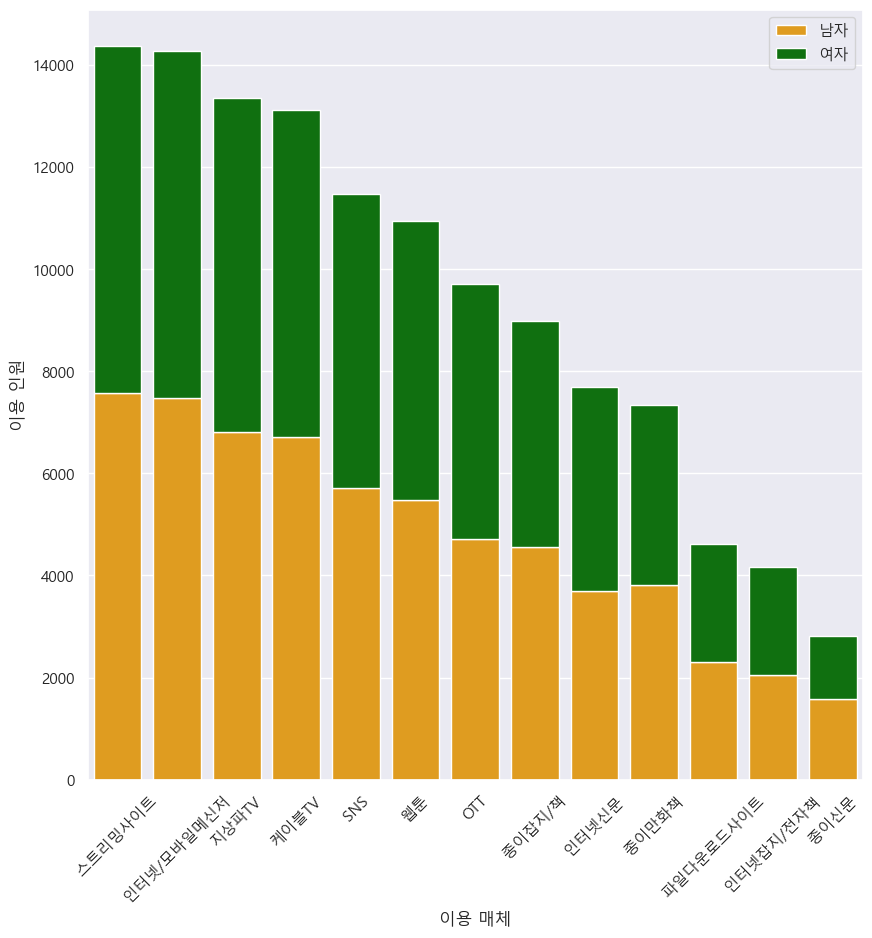

In [66]:
plt.figure(figsize=(10, 5))
colors = ['orange', 'green']
my_labels = ['남자', '여자']
my_columns = ['남자', '여자']

# 정렬
sums = grouped_df2[my_columns].sum(axis=0)
sort_order = sums.sort_values(ascending=False).index


# 막대그래프를 그립니다
plt.figure(figsize=(10, 10))
ax = None  # 첫 번째 ax 객체를 초기화합니다
for i, col in enumerate(my_columns):
    ax = sns.barplot(data=grouped_df2, x='매체 유형', y=col, bottom=grouped_df2[my_columns[:i]].sum(axis=1), color=colors[i], ax=ax, label=my_labels[i])
    
# 범례와 축 레이블을 추가합니다
ax.legend()
ax.set(xlabel='이용 매체', ylabel='이용 인원')
plt.xticks(rotation=45)

# 그래프를 출력합니다
plt.show()

# 💙 유해차단 프로그램 설치 여부

In [67]:
data = data_raw.copy()

[ 범주별 빈도수 ]


,한다,안한다,무응답
YM0601,8912,5498,126


,설치되어 있는지 잘 모르겠음,설치되어 있지 않음,설치되어 있음,무응답
YM06_101,3815,3188,1840,69



[ 범주별 비율 ]


,한다,안한다,무응답
YM0601,0.613099,0.378233,0.008668


,설치되어 있는지 잘 모르겠음,설치되어 있지 않음,설치되어 있음,무응답
YM06_101,0.262452,0.219318,0.126582,0.004747



[ Bar Chart ]


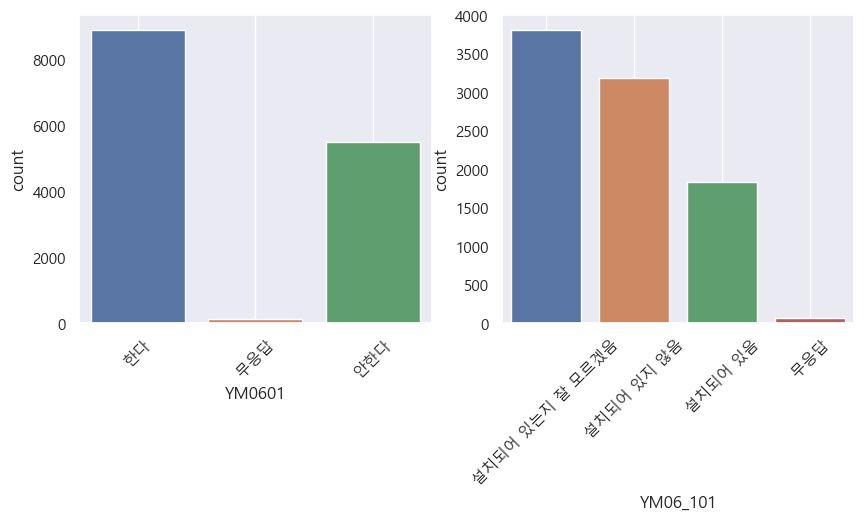

In [68]:
uni_eda_c2(data, 'YM0601', 'YM06_101')

[ 범주별 빈도수 ]


,안한다,한다,무응답
YM0602,8409,5979,148


,설치되어 있는지 잘 모르겠음,설치되어 있지 않음,설치되어 있음,무응답
YM06_102,2249,2217,1424,89



[ 범주별 비율 ]


,안한다,한다,무응답
YM0602,0.578495,0.411324,0.010182


,설치되어 있는지 잘 모르겠음,설치되어 있지 않음,설치되어 있음,무응답
YM06_102,0.154719,0.152518,0.097964,0.006123



[ Bar Chart ]


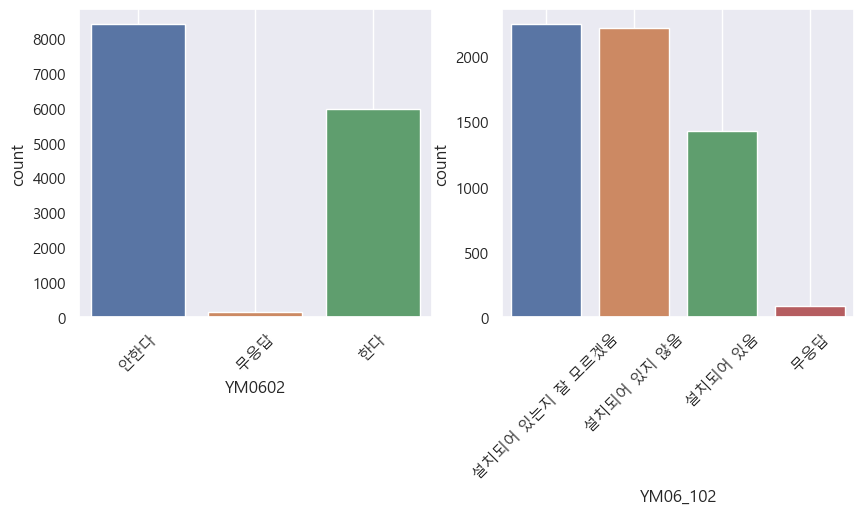

In [69]:
uni_eda_c2(data, 'YM0602', 'YM06_102')

[ 범주별 빈도수 ]


,안한다,한다,무응답
YM0603,8302,6038,196


,설치되어 있는지 잘 모르겠음,설치되어 있음,설치되어 있지 않음,무응답
YM06_103,2988,2095,829,126



[ 범주별 비율 ]


,안한다,한다,무응답
YM0603,0.571134,0.415382,0.013484


,설치되어 있는지 잘 모르겠음,설치되어 있음,설치되어 있지 않음,무응답
YM06_103,0.205559,0.144125,0.057031,0.008668



[ Bar Chart ]


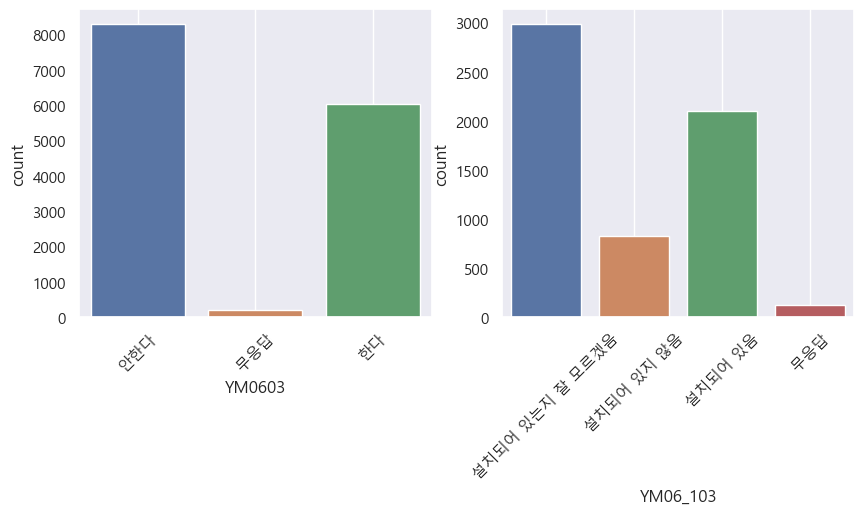

In [70]:
uni_eda_c2(data, 'YM0603', 'YM06_103')

[ 범주별 빈도수 ]


,한다,안한다,무응답
YM0604,10706,3710,120


,설치되어 있지 않음,설치되어 있음,설치되어 있는지 잘 모르겠음,무응답
YM06_104,4027,3252,3244,183



[ 범주별 비율 ]


,한다,안한다,무응답
YM0604,0.736516,0.255228,0.008255


,설치되어 있지 않음,설치되어 있음,설치되어 있는지 잘 모르겠음,무응답
YM06_104,0.277036,0.22372,0.22317,0.012589



[ Bar Chart ]


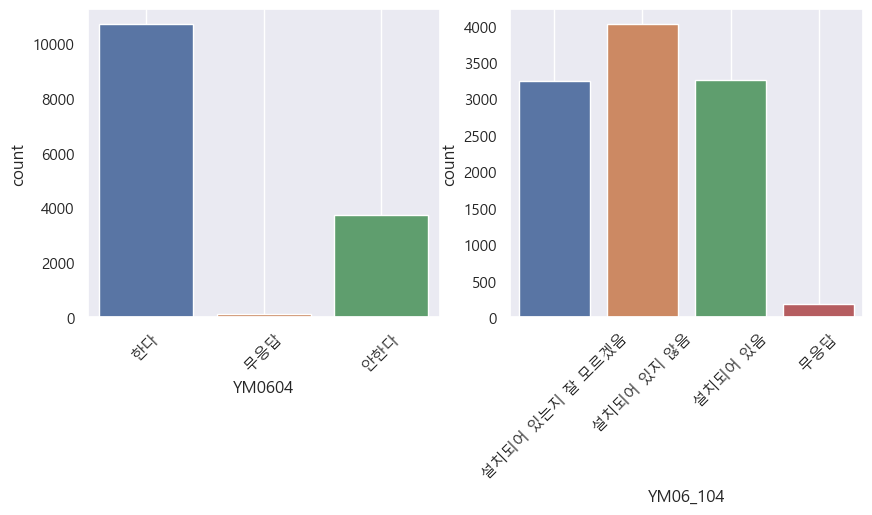

In [71]:
uni_eda_c2(data, 'YM0604', 'YM06_104')

## ❕ 유해 차단 프로그램 설치 여부 : 초중고 별

<Figure size 1000x500 with 0 Axes>

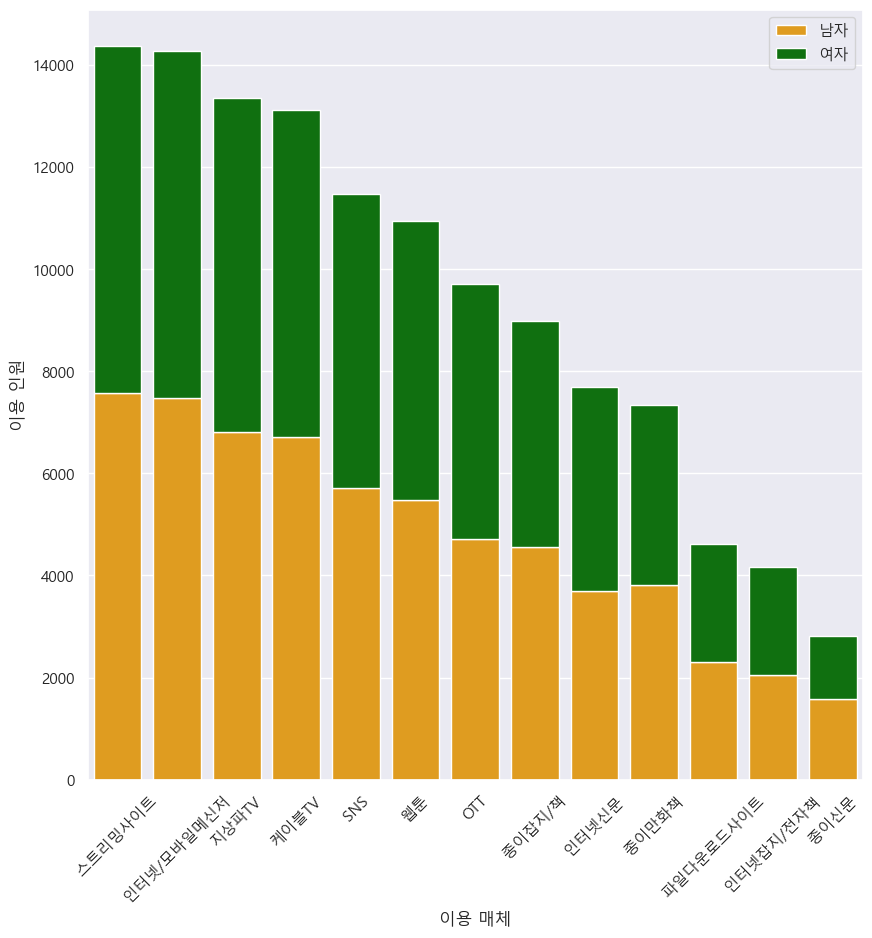

In [72]:
plt.figure(figsize=(10, 5))
colors = ['orange', 'green']
my_labels = ['남자', '여자']
my_columns = ['남자', '여자']

# 정렬
sums = grouped_df2[my_columns].sum(axis=0)
sort_order = sums.sort_values(ascending=False).index


# 막대그래프를 그립니다
plt.figure(figsize=(10, 10))
ax = None  # 첫 번째 ax 객체를 초기화합니다
for i, col in enumerate(my_columns):
    ax = sns.barplot(data=grouped_df2, x='매체 유형', y=col, bottom=grouped_df2[my_columns[:i]].sum(axis=1), color=colors[i], ax=ax, label=my_labels[i])
    
# 범례와 축 레이블을 추가합니다
ax.legend()
ax.set(xlabel='이용 매체', ylabel='이용 인원')
plt.xticks(rotation=45)

# 그래프를 출력합니다
plt.show()

## ❕ 유해 차단 프로그램 설치 여부 : 남녀 별

In [73]:
def get_grouped_df(cols, re_dict, ma_dict, ma_col, type_name, re_names, real_type_names):

    replace_dict = {}
    for col in cols:
        replace_dict[col] = re_dict
    
    # make groupby_df
    groupby_dict = {}
    for col in cols:
        groupby_dict[col] = 'sum'
    data[ma_col] = data[ma_col].map(ma_dict)
    grouped_df = data.groupby(ma_col).agg(groupby_dict).reset_index()
    
    grouped_df2 = grouped_df.T.reset_index().drop(0, axis=0).reset_index().drop('level_0', axis=1).rename(columns=re_names)
    grouped_df2[type_name] = real_type_names
    
    
    grouped_df2['합계'] = grouped_df2['남자'] + grouped_df2['여자']
    grouped_df2 = grouped_df2.sort_values('합계', ascending=False).reset_index()

    grouped_df2.drop(['index', '합계'], axis=1, inplace=True)
    return grouped_df2
    
    
    
data = data_raw.copy()
my_columns = ['YM06_101', 'YM06_102', 'YM06_103', 'YM06_104']
rep = {2 : 0, 9 : 0}
ma = {1: '남자', 2: '여자'}
ma_c = 'DM1'
t_name = '기기 유형'
re_name = {'index' : t_name, 0: '남자', 1: '여자'}
real_t = ['집 PC/노트북', '집 태블릿PC', '학교 PC/노트북', '학교 태블릿PC']

    
grouped_df2 = get_grouped_df(my_columns, rep, ma, ma_c, t_name, re_name, real_t)
grouped_df2

,기기 유형,남자,여자
0,학교 태블릿PC,11166,11519
1,집 PC/노트북,10027,10255
2,학교 PC/노트북,6459,7392
3,집 태블릿PC,6044,7362


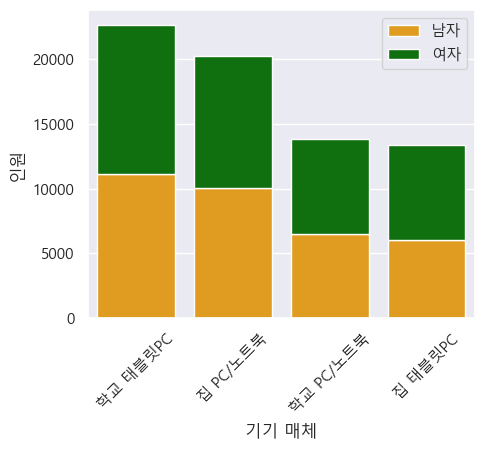

In [74]:
colors = ['orange', 'green']
my_labels = ['남자', '여자']
my_columns = ['남자', '여자']

# 정렬
sums = grouped_df2[my_columns].sum(axis=0)
sort_order = sums.sort_values(ascending=False).index


# 막대그래프를 그립니다
plt.figure(figsize=(5, 4))
ax = None  # 첫 번째 ax 객체를 초기화합니다
for i, col in enumerate(my_columns):
    ax = sns.barplot(data=grouped_df2, x='기기 유형', y=col, bottom=grouped_df2[my_columns[:i]].sum(axis=1), color=colors[i], ax=ax, label=my_labels[i])
    
# 범례와 축 레이블을 추가합니다
ax.legend()
ax.set(xlabel='기기 매체', ylabel='인원')
plt.xticks(rotation=45)

# 그래프를 출력합니다
plt.show()

# 💙 성인 컨텐츠 이용 경험 

In [76]:
data = data_raw.copy()
data.head()

,ID,ID_1,ID_2,GUBUN,S_NAME,AGREE,YM0101A,YM0101B,YM0101C,YM0102A,...,DDM2,DDM3,DDM4,DDM5,DDM6,DDM7,DDM8,DDM9,DDM10,DDM11
1,500201,1,5002,1,울산강남초,1,2,NaN,NaN,2,...,0,2,9,9,1,9,9,9,9,9
2,500202,2,5002,1,울산강남초,1,1,3,4,1,...,0,2,9,9,1,9,9,9,9,9
3,500203,3,5002,1,울산강남초,1,1,1,4,1,...,0,2,9,9,1,9,9,9,9,9
4,500204,4,5002,1,울산강남초,1,1,1,2,1,...,0,1,9,9,1,9,9,9,9,9
5,500206,6,5002,1,울산강남초,1,1,1,4,1,...,0,2,9,9,1,9,9,9,9,9


### 1️⃣ 성인용 TV 프로그램, 영화, 동영상 등 (성인용 영상 컨텐츠)

In [77]:
adults_video = data.copy()
av_columns = ['YM02', 'YM02_101', 'YM02_102', 'YM02_103', 'YM02_104', 'YM02_105', 'YM02_106', 'YM02_107', 'DM1', 'DM3']
av_columns_replace_dict = {'YM02':'이용경험', 'YM02_101':'TV방송', 'YM02_102':'인터넷 포털사이트', 'YM02_103':'인터넷개인방송/동영상사이트', 
                           'YM02_104':'인터넷/모바일메신저', 'YM02_105':'인터넷 SNS', 'YM02_106':'파일다운로드 사이트', 'YM02_107':'스마트폰앱', 
                           'DM1':'성별', 'DM3':'학교급'}
adults_video = adults_video.loc[:, av_columns]
adults_video = adults_video.rename(columns=av_columns_replace_dict)
adults_video

,이용경험,TV방송,인터넷 포털사이트,인터넷개인방송/동영상사이트,인터넷/모바일메신저,인터넷 SNS,파일다운로드 사이트,스마트폰앱,성별,학교급
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
2,1,1,1,1,1,1,1,1,2,1
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...
14532,1,1,2,2,2,2,2,2,1,3
14533,1,2,1,2,2,2,2,2,1,3
14534,1,1,2,1,2,2,2,2,1,3
14535,1,2,1,2,2,2,2,2,1,3


In [78]:
adults_video['이용경험'].value_counts()

2    8492
1    5232
9     812
Name: 이용경험, dtype: int64

In [79]:
# 이용경험에서 무응답 drop
adults_video = adults_video.loc[adults_video['이용경험']!=9, :]
adults_video

,이용경험,TV방송,인터넷 포털사이트,인터넷개인방송/동영상사이트,인터넷/모바일메신저,인터넷 SNS,파일다운로드 사이트,스마트폰앱,성별,학교급
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
2,1,1,1,1,1,1,1,1,2,1
4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...
14532,1,1,2,2,2,2,2,2,1,3
14533,1,2,1,2,2,2,2,2,1,3
14534,1,1,2,1,2,2,2,2,1,3
14535,1,2,1,2,2,2,2,2,1,3


In [80]:
# 이용경험에서 yes 응답만 추출
adults_video_yes = adults_video.loc[adults_video['이용경험']==1, :]
adults_video_yes

,이용경험,TV방송,인터넷 포털사이트,인터넷개인방송/동영상사이트,인터넷/모바일메신저,인터넷 SNS,파일다운로드 사이트,스마트폰앱,성별,학교급
2,1,1,1,1,1,1,1,1,2,1
14,1,2,2,1,2,2,2,2,1,1
16,1,1,1,1,1,2,1,1,1,1
17,1,1,1,1,1,1,2,1,1,1
18,1,2,2,1,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...
14532,1,1,2,2,2,2,2,2,1,3
14533,1,2,1,2,2,2,2,2,1,3
14534,1,1,2,1,2,2,2,2,1,3
14535,1,2,1,2,2,2,2,2,1,3


In [81]:
# 성별, 학교급은 숫자->값
adults_video_yes['성별'] = adults_video_yes['성별'].replace({1:'남자', 2:'여자'})
adults_video_yes['학교급'] = adults_video_yes['학교급'].replace({1:'초등학교', 2:'중학교', 3:'고등학교'})
adults_video_yes

C:\Users\User\AppData\Local\Temp\ipykernel_16844\2808603053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adults_video_yes['성별'] = adults_video_yes['성별'].replace({1:'남자', 2:'여자'})
C:\Users\User\AppData\Local\Temp\ipykernel_16844\2808603053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adults_video_yes['학교급'] = adults_video_yes['학교급'].replace({1:'초등학교', 2:'중학교', 3:'고등학교'})


,이용경험,TV방송,인터넷 포털사이트,인터넷개인방송/동영상사이트,인터넷/모바일메신저,인터넷 SNS,파일다운로드 사이트,스마트폰앱,성별,학교급
2,1,1,1,1,1,1,1,1,여자,초등학교
14,1,2,2,1,2,2,2,2,남자,초등학교
16,1,1,1,1,1,2,1,1,남자,초등학교
17,1,1,1,1,1,1,2,1,남자,초등학교
18,1,2,2,1,2,2,2,2,남자,초등학교
...,...,...,...,...,...,...,...,...,...,...
14532,1,1,2,2,2,2,2,2,남자,고등학교
14533,1,2,1,2,2,2,2,2,남자,고등학교
14534,1,1,2,1,2,2,2,2,남자,고등학교
14535,1,2,1,2,2,2,2,2,남자,고등학교


In [82]:
# 2 -> 0 으로 바꾸기
adults_video_yes = adults_video_yes.replace({2 : 0})
adults_video_yes

,이용경험,TV방송,인터넷 포털사이트,인터넷개인방송/동영상사이트,인터넷/모바일메신저,인터넷 SNS,파일다운로드 사이트,스마트폰앱,성별,학교급
2,1,1,1,1,1,1,1,1,여자,초등학교
14,1,0,0,1,0,0,0,0,남자,초등학교
16,1,1,1,1,1,0,1,1,남자,초등학교
17,1,1,1,1,1,1,0,1,남자,초등학교
18,1,0,0,1,0,0,0,0,남자,초등학교
...,...,...,...,...,...,...,...,...,...,...
14532,1,1,0,0,0,0,0,0,남자,고등학교
14533,1,0,1,0,0,0,0,0,남자,고등학교
14534,1,1,0,1,0,0,0,0,남자,고등학교
14535,1,0,1,0,0,0,0,0,남자,고등학교


#### 초등학생

In [83]:
ele_adults_video_yes = adults_video_yes.loc[adults_video_yes['학교급']=='초등학교']
ele_adults_video_yes.head()

,이용경험,TV방송,인터넷 포털사이트,인터넷개인방송/동영상사이트,인터넷/모바일메신저,인터넷 SNS,파일다운로드 사이트,스마트폰앱,성별,학교급
2,1,1,1,1,1,1,1,1,여자,초등학교
14,1,0,0,1,0,0,0,0,남자,초등학교
16,1,1,1,1,1,0,1,1,남자,초등학교
17,1,1,1,1,1,1,0,1,남자,초등학교
18,1,0,0,1,0,0,0,0,남자,초등학교


In [84]:
ele_adults_video_yes.sum()

이용경험                                                           1406
TV방송                                                           1134
인터넷 포털사이트                                                      1640
인터넷개인방송/동영상사이트                                                 1722
인터넷/모바일메신저                                                     1660
인터넷 SNS                                                        1333
파일다운로드 사이트                                                     1194
스마트폰앱                                                          1615
성별                여자남자남자남자남자여자여자여자남자남자남자남자남자남자남자남자남자남자남자여자여자남자남자...
학교급               초등학교초등학교초등학교초등학교초등학교초등학교초등학교초등학교초등학교초등학교초등학교초등...
dtype: object

In [85]:
ele_adults_video_yes.columns

Index(['이용경험', 'TV방송', '인터넷 포털사이트', '인터넷개인방송/동영상사이트', '인터넷/모바일메신저', '인터넷 SNS',
       '파일다운로드 사이트', '스마트폰앱', '성별', '학교급'],
      dtype='object')

In [86]:
list(ele_adults_video_yes.sum())[1:8]

[1134, 1640, 1722, 1660, 1333, 1194, 1615]

In [87]:
ele_dict = {}


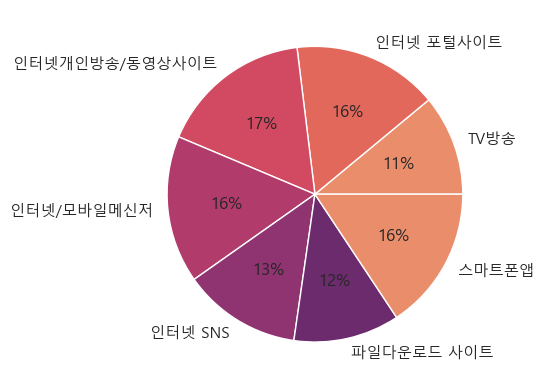

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

data = list(ele_adults_video_yes.sum())[1:8]
labels = ['TV방송', '인터넷 포털사이트', '인터넷개인방송/동영상사이트', '인터넷/모바일메신저', '인터넷 SNS',
       '파일다운로드 사이트', '스마트폰앱']
colors = sns.color_palette('flare')[0:7]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [2]:
data_raw = pd.read_excel('청소년 매체이용 및 유해환경 실태조사.xlsx')
data_raw.drop(0, axis=0, inplace=True)
data = data_raw.copy()

# 💛 성인용 컨텐츠 이용 경험

### 【이용여부】 성인용 컨텐츠

In [3]:
adults_contents = data.copy()
ac_columns = ['YM02', 'YM03', 'YM0501', 'YM0502', 'YM0503', 'YM0504', 'DM1', 'DM3']
ac_columns_replace_dict = {'YM02':'성인용 영상물', 'YM03':'성인용 간행물', 'YM0501':'성인용 게임', 'YM0502':'도박성 게임', 'YM0503':'성인용 음악영상 파일', 'YM0504':'조건만남 메신저/채팅앱',
                           'DM1':'성별', 'DM3':'학교급'}
adults_contents = adults_contents.loc[:, ac_columns]
adults_contents = adults_contents.rename(columns=ac_columns_replace_dict)

In [4]:
# 컨텐츠 유형
col1 = ['성인용 영상물', '성인용 간행물', '성인용 게임', '도박성 게임', '성인용 음악영상 파일', '조건만남 메신저/채팅앱']

# 컨텐츠 이용 -> 1 : 있다
col2 = []
for col in col1:
    col2.append(adults_contents.loc[adults_contents[col]==1, col].count())

# 컨텐츠 이용 -> 2 : 있다'
col3 = []
for col in col1:
    col3.append(adults_contents.loc[adults_contents[col]==2, col].count())
    
# df 생성
total_use = pd.DataFrame({'컨텐츠 유형':col1, '있다':col2, '없다':col3})
total_use

# 비율 생성
total_use['응답 수'] = total_use['있다'] + total_use['없다']
def get_ratio(row):
    return row['있다'] / row['응답 수']
def get_ratio2(row):
    return row['없다'] / row['응답 수']
total_use['있다 비율'] = total_use.apply(get_ratio, axis=1)
total_use['없다 비율'] = total_use.apply(get_ratio2, axis=1)
total_use

,컨텐츠 유형,있다,없다,응답 수,있다 비율,없다 비율
0,성인용 영상물,5232,8492,13724,0.381230,0.618770
1,성인용 간행물,3437,10218,13655,0.251703,0.748297
2,성인용 게임,2456,11969,14425,0.170260,0.829740
3,도박성 게임,740,13661,14401,0.051385,0.948615
4,성인용 음악영상 파일,1840,12562,14402,0.127760,0.872240
5,조건만남 메신저/채팅앱,549,13867,14416,0.038083,0.961917


<Figure size 1600x800 with 0 Axes>

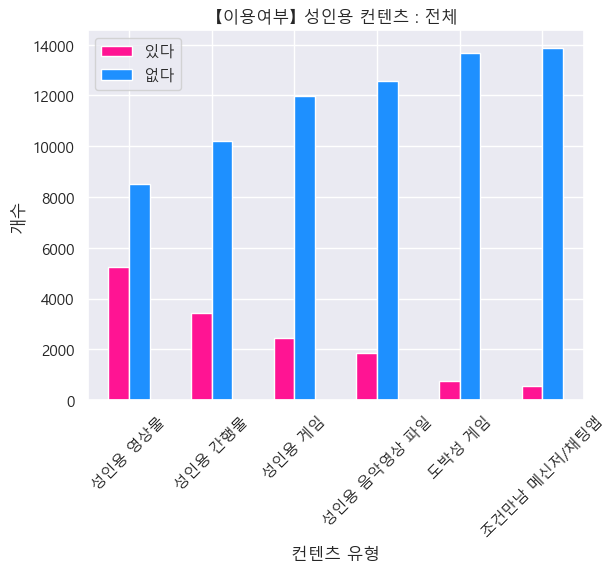

In [5]:
df_sorted = total_use.sort_values(by='있다', ascending=False)
plt.figure(figsize=(16, 8))
ax = df_sorted.plot(x='컨텐츠 유형', y=['있다', '없다'], kind='bar', color=['deeppink', 'dodgerblue'])
ax.set_title('【이용여부】 성인용 컨텐츠 : 전체')
ax.set_xlabel('컨텐츠 유형')
ax.set_ylabel('개수')
plt.xticks(rotation=45)
plt.show()

## ❕ 성인용 영상물 & 성인용 간행물

### 【이용여부】 성인용 영상물 : 전체/성별/학교급

In [6]:
adults_video = data.copy()
av_columns = ['YM02', 'YM02_101', 'YM02_102', 'YM02_103', 'YM02_104', 'YM02_105', 'YM02_106', 'YM02_107', 'DM1', 'DM3']
av_columns_replace_dict = {'YM02':'이용경험', 'YM02_101':'TV방송', 'YM02_102':'인터넷 포털사이트', 'YM02_103':'인터넷개인방송/동영상사이트', 
                           'YM02_104':'인터넷/모바일메신저', 'YM02_105':'인터넷 SNS', 'YM02_106':'파일다운로드 사이트', 'YM02_107':'스마트폰앱', 
                           'DM1':'성별', 'DM3':'학교급'}
adults_video = adults_video.loc[:, av_columns]
adults_video = adults_video.rename(columns=av_columns_replace_dict)
adults_video

,이용경험,TV방송,인터넷 포털사이트,인터넷개인방송/동영상사이트,인터넷/모바일메신저,인터넷 SNS,파일다운로드 사이트,스마트폰앱,성별,학교급
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
2,1,1,1,1,1,1,1,1,2,1
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...
14532,1,1,2,2,2,2,2,2,1,3
14533,1,2,1,2,2,2,2,2,1,3
14534,1,1,2,1,2,2,2,2,1,3
14535,1,2,1,2,2,2,2,2,1,3


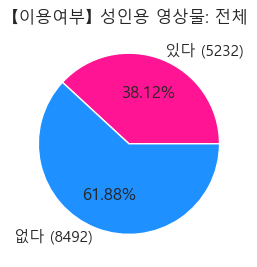

,여자,남자,합계,여자비율,남자비율
있다,1929,3303,5232,0.279444,0.432726
없다,4543,3949,8492,0.658120,0.517359
무응답,431,381,812,0.062437,0.049915


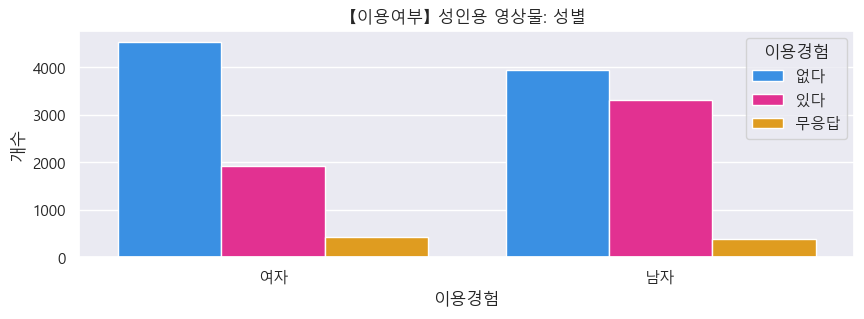

,초등학교,중학교,고등학교,합계,초등학교비율,중학교비율,고등학교비율
있다,1406,1397,2429,5232,0.302887,0.314781,0.445198
없다,2804,2794,2894,8492,0.604050,0.629563,0.530425
무응답,432,247,133,812,0.093063,0.055656,0.024377


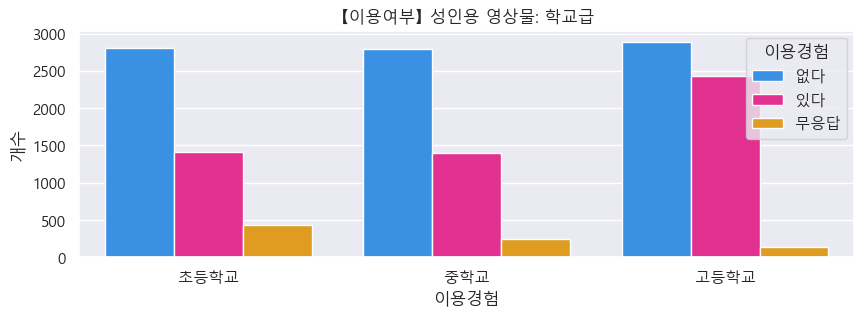

In [7]:
def show_use(df, name):
    # [전체] 이용 경험
    plt.figure(figsize=(10, 10))
    df2 = [df.loc[df['이용경험']==1, '이용경험'].count(), df.loc[df['이용경험']==2, '이용경험'].count()]
    labels = [f'있다 ({df2[0]})', f'없다 ({df2[1]})']
    colors=['deeppink', 'dodgerblue']
    plt.subplot(3, 1, 1)
    plt.pie(df2, labels = labels, colors = colors, autopct='%.2f%%')
    plt.title('【이용여부】 ' + name + ': 전체')
    plt.show()

    # [성별] 이용 경험
    plt.figure(figsize=(10, 10))
    temp = df.loc[:, ['이용경험', '성별']]
    temp['이용경험'] = temp['이용경험'].replace({1: '있다', 2: '없다', 9: '무응답'})
    temp['성별'] = temp['성별'].replace({1: '남자', 2: '여자'})
    
    new_df = pd.DataFrame({'여자': [temp.groupby('성별')['이용경험'].apply(lambda x: (x == '있다').sum()).loc['여자'],
                                temp.groupby('성별')['이용경험'].apply(lambda x: (x == '없다').sum()).loc['여자'],
                                temp.groupby('성별')['이용경험'].apply(lambda x: (x == '무응답').sum()).loc['여자']],
                       '남자': [temp.groupby('성별')['이용경험'].apply(lambda x: (x == '있다').sum()).loc['남자'],
                                temp.groupby('성별')['이용경험'].apply(lambda x: (x == '없다').sum()).loc['남자'],
                                temp.groupby('성별')['이용경험'].apply(lambda x: (x == '무응답').sum()).loc['남자']],
                       '합계': [temp.groupby('성별')['이용경험'].apply(lambda x: (x == '있다').sum()).sum(),
                               temp.groupby('성별')['이용경험'].apply(lambda x: (x == '없다').sum()).sum(),
                               temp.groupby('성별')['이용경험'].apply(lambda x: (x == '무응답').sum()).sum()]},
                      index=['있다', '없다', '무응답'])

    # 결과 출력
    new_df2 = new_df.drop('합계', axis=1)
    new_df2 = new_df2.div(new_df2.sum(axis=0), axis=1)
    new_df2 = new_df2.rename(columns={'여자':'여자비율', '남자':'남자비율'})
    new_df3 = pd.merge(new_df, new_df2, left_index=True, right_index=True)
    display(new_df3)

    # 시각화
    plt.subplot(3, 1, 2)
    sns.countplot(x='성별', hue='이용경험', data=temp, palette=['dodgerblue', 'deeppink', 'orange'], hue_order=['없다', '있다', '무응답'])
    plt.title('【이용여부】 ' + name + ': 성별')
    plt.xlabel('이용경험')
    plt.ylabel('개수')
    plt.show()

    # [학교급] 이용 경험
    plt.figure(figsize=(10, 10))
    temp = df.loc[:, ['이용경험', '학교급']]
    temp['이용경험'] = temp['이용경험'].replace({1: '있다', 2: '없다', 9: '무응답'})
    temp['학교급'] = temp['학교급'].replace({1: '초등학교', 2: '중학교', 3: '고등학교'})
    
    new_df = pd.DataFrame({'초등학교': [temp.groupby('학교급')['이용경험'].apply(lambda x: (x == '있다').sum()).loc['초등학교'],
                            temp.groupby('학교급')['이용경험'].apply(lambda x: (x == '없다').sum()).loc['초등학교'],
                            temp.groupby('학교급')['이용경험'].apply(lambda x: (x == '무응답').sum()).loc['초등학교']],
                   '중학교': [temp.groupby('학교급')['이용경험'].apply(lambda x: (x == '있다').sum()).loc['중학교'],
                            temp.groupby('학교급')['이용경험'].apply(lambda x: (x == '없다').sum()).loc['중학교'],
                            temp.groupby('학교급')['이용경험'].apply(lambda x: (x == '무응답').sum()).loc['중학교']],
                    '고등학교': [temp.groupby('학교급')['이용경험'].apply(lambda x: (x == '있다').sum()).loc['고등학교'],
                            temp.groupby('학교급')['이용경험'].apply(lambda x: (x == '없다').sum()).loc['고등학교'],
                            temp.groupby('학교급')['이용경험'].apply(lambda x: (x == '무응답').sum()).loc['고등학교']],
                   '합계': [temp.groupby('학교급')['이용경험'].apply(lambda x: (x == '있다').sum()).sum(),
                           temp.groupby('학교급')['이용경험'].apply(lambda x: (x == '없다').sum()).sum(),
                           temp.groupby('학교급')['이용경험'].apply(lambda x: (x == '무응답').sum()).sum()]},
                  index=['있다', '없다', '무응답'])

    # 결과 출력
    new_df2 = new_df.drop('합계', axis=1)
    new_df2 = new_df2.div(new_df2.sum(axis=0), axis=1)
    new_df2 = new_df2.rename(columns={'초등학교':'초등학교비율', '중학교':'중학교비율', '고등학교':'고등학교비율'})
    new_df3 = pd.merge(new_df, new_df2, left_index=True, right_index=True)
    display(new_df3)

    # 시각화
    plt.subplot(3, 1, 3)
    sns.countplot(x='학교급', hue='이용경험', data=temp, palette=['dodgerblue', 'deeppink', 'orange'], hue_order=['없다', '있다', '무응답'])
    plt.title('【이용여부】 ' + name + ': 학교급')
    plt.xlabel('이용경험')
    plt.ylabel('개수')
    plt.show()

show_use(adults_video, '성인용 영상물')

### 【이용여부】 성인용 간행물 : 전체/성별/학교급

In [8]:
adults_pulication = data.copy()
ap_columns = ['YM03', 'YM03_101', 'YM03_102', 'YM03_103', 'YM03_104', 'YM03_105', 'YM03_106', 'YM03_107', 'YM03_108', 'YM03_109', 'YM03_110', 'YM03_111', 'DM1', 'DM3']
ap_columns_replace_dict = {'YM03':'이용경험', 'YM03_101':'종이신문', 'YM03_102':'인터넷신문', 'YM03_103':'종이잡지', 'YM03_104':'인터넷잡지', 'YM03_105':'종이만화책', 
                           'YM03_106':'웹툰', 'YM03_107':'종이사진집', 'YM03_108':'전자사진집', 'YM03_109':'책', 'YM03_110':'인터넷소설', 'YM03_111':'전자책',
                           'DM1':'성별', 'DM3':'학교급'}
adults_pulication = adults_pulication.loc[:, ap_columns]
adults_pulication = adults_pulication.rename(columns=ap_columns_replace_dict)
adults_pulication

,이용경험,종이신문,인터넷신문,종이잡지,인터넷잡지,종이만화책,웹툰,종이사진집,전자사진집,책,인터넷소설,전자책,성별,학교급
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
4,1,2,2,2,2,1,2,2,2,2,2,2,2,1
5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14532,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3
14533,1,2,2,2,2,2,1,2,2,2,2,2,1,3
14534,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3
14535,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3


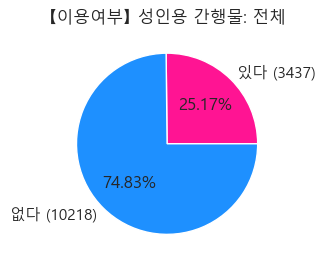

,여자,남자,합계,여자비율,남자비율
있다,1345,2092,3437,0.194843,0.274073
없다,5085,5133,10218,0.736636,0.672475
무응답,473,408,881,0.068521,0.053452


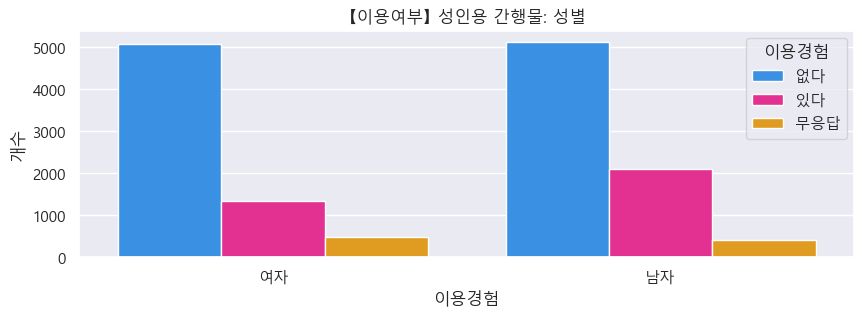

,초등학교,중학교,고등학교,합계,초등학교비율,중학교비율,고등학교비율
있다,1154,955,1328,3437,0.248600,0.215187,0.243402
없다,3036,3224,3958,10218,0.654028,0.726453,0.725440
무응답,452,259,170,881,0.097372,0.058360,0.031158


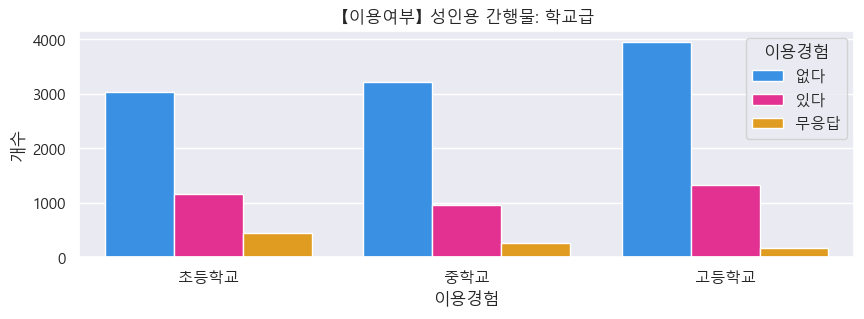

In [9]:
show_use(adults_pulication, '성인용 간행물')

### 【이용경로】 성인용 영상물

In [10]:
adults_video.head()

,이용경험,TV방송,인터넷 포털사이트,인터넷개인방송/동영상사이트,인터넷/모바일메신저,인터넷 SNS,파일다운로드 사이트,스마트폰앱,성별,학교급
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
2,1,1,1,1,1,1,1,1,2,1
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1


In [11]:
temp = adults_video.drop(['이용경험', '성별', '학교급'], axis=1)
temp = temp.fillna(0).replace(to_replace=[2, 9], value=0)
temp

,TV방송,인터넷 포털사이트,인터넷개인방송/동영상사이트,인터넷/모바일메신저,인터넷 SNS,파일다운로드 사이트,스마트폰앱
1,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
14532,1,0,0,0,0,0,0
14533,0,1,0,0,0,0,0
14534,1,0,1,0,0,0,0
14535,0,1,0,0,0,0,0


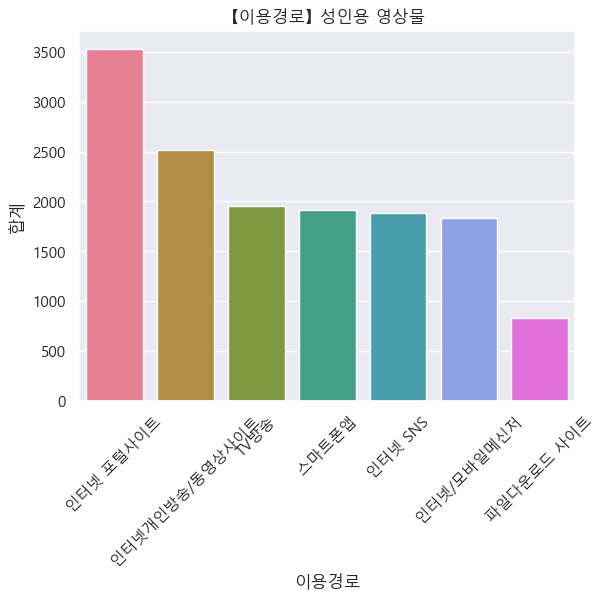

In [12]:
sums = temp.sum()

# 합계를 기준으로 데이터 정렬
sums_sorted = sums.sort_values(ascending=False)

# 시각화
sns.barplot(x=sums_sorted.index, y=sums_sorted.values, palette='husl')
plt.title('【이용경로】 성인용 영상물')
plt.xlabel('이용경로')
plt.ylabel('합계')
plt.xticks(rotation=45)
plt.show()

### 【이용경로】 성인용 간행물

In [13]:
adults_pulication.head()

,이용경험,종이신문,인터넷신문,종이잡지,인터넷잡지,종이만화책,웹툰,종이사진집,전자사진집,책,인터넷소설,전자책,성별,학교급
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
4,1,2,2,2,2,1,2,2,2,2,2,2,2,1
5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1


In [14]:
temp = adults_pulication.drop(['이용경험', '성별', '학교급'], axis=1)
temp = temp.fillna(0).replace(to_replace=[2, 9], value=0)
temp

,종이신문,인터넷신문,종이잡지,인터넷잡지,종이만화책,웹툰,종이사진집,전자사진집,책,인터넷소설,전자책
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14532,0,0,0,0,0,0,0,0,0,0,0
14533,0,0,0,0,0,1,0,0,0,0,0
14534,0,0,0,0,0,0,0,0,0,0,0
14535,0,0,0,0,0,0,0,0,0,0,0


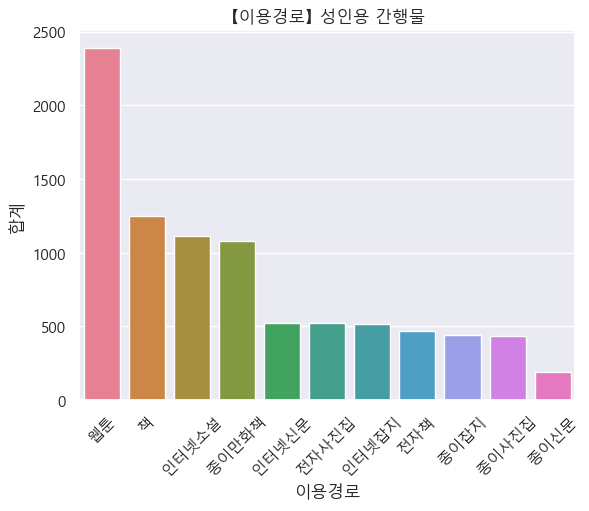

In [15]:
sums = temp.sum()

# 합계를 기준으로 데이터 정렬
sums_sorted = sums.sort_values(ascending=False)

# 시각화
sns.barplot(x=sums_sorted.index, y=sums_sorted.values, palette='husl')
plt.title('【이용경로】 성인용 간행물')
plt.xlabel('이용경로')
plt.ylabel('합계')
plt.xticks(rotation=45)
plt.show()

## ❕ 신변종 유해매체물

### 【이용여부】 성인용 게임 : 전체/성별/학교급

In [16]:
adults_game = data.copy()
ag_columns = ['YM0501', 'YM05_101', 'DM1', 'DM3']
ag_columns_replace_dict = {'YM0501':'이용경험', 'YM05_101':'나이확인',
                           'DM1':'성별', 'DM3':'학교급'}
adults_game = adults_game.loc[:, ag_columns]
adults_game = adults_game.rename(columns=ag_columns_replace_dict)
adults_game

,이용경험,나이확인,성별,학교급
1,2,NaN,2,1
2,9,NaN,2,1
3,2,NaN,2,1
4,2,NaN,2,1
5,2,NaN,2,1
...,...,...,...,...
14532,2,NaN,1,3
14533,2,NaN,1,3
14534,1,1,1,3
14535,2,NaN,1,3


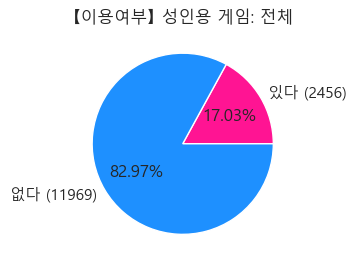

,여자,남자,합계,여자비율,남자비율
있다,566,1890,2456,0.081993,0.247609
없다,6292,5677,11969,0.911488,0.743744
무응답,45,66,111,0.006519,0.008647


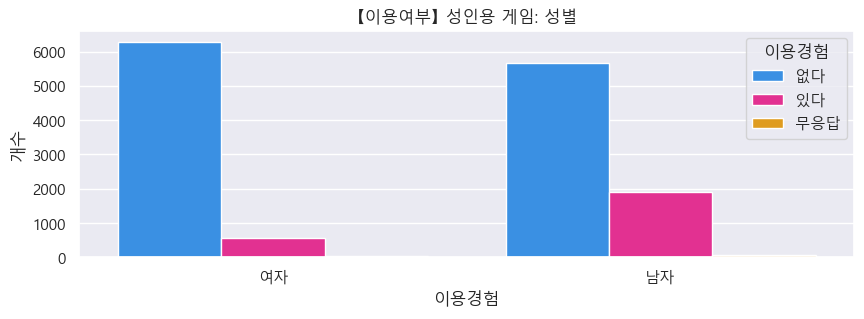

,초등학교,중학교,고등학교,합계,초등학교비율,중학교비율,고등학교비율
있다,443,791,1222,2456,0.095433,0.178233,0.223974
없다,4150,3607,4212,11969,0.894011,0.812753,0.771994
무응답,49,40,22,111,0.010556,0.009013,0.004032


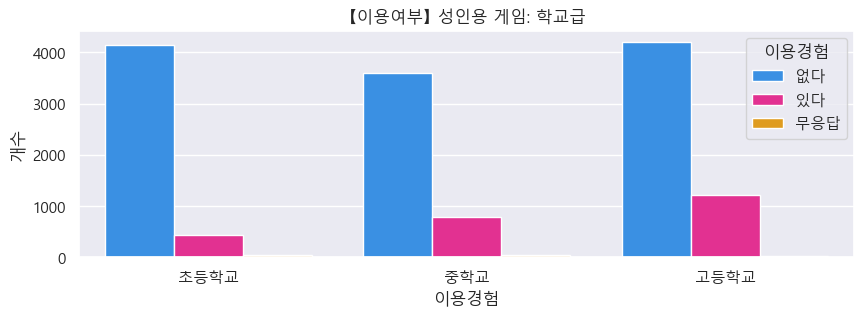

In [17]:
show_use(adults_game, '성인용 게임')

### 【이용여부】 도박성 게임 : 전체/성별/학교급

In [18]:
gamble_game = data.copy()
gg_columns = ['YM0502', 'YM05_102', 'DM1', 'DM3']
gg_columns_replace_dict = {'YM0502':'이용경험', 'YM05_102':'나이확인',
                           'DM1':'성별', 'DM3':'학교급'}
gamble_game = gamble_game.loc[:, gg_columns]
gamble_game = gamble_game.rename(columns=gg_columns_replace_dict)
gamble_game

,이용경험,나이확인,성별,학교급
1,2,NaN,2,1
2,9,NaN,2,1
3,2,NaN,2,1
4,2,NaN,2,1
5,2,NaN,2,1
...,...,...,...,...
14532,2,NaN,1,3
14533,2,NaN,1,3
14534,1,2,1,3
14535,2,NaN,1,3


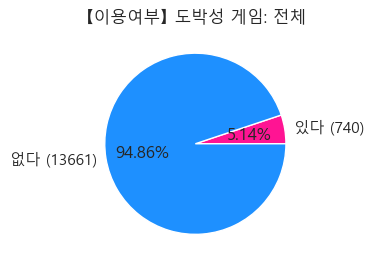

,여자,남자,합계,여자비율,남자비율
있다,195,545,740,0.028249,0.071400
없다,6656,7005,13661,0.964218,0.917726
무응답,52,83,135,0.007533,0.010874


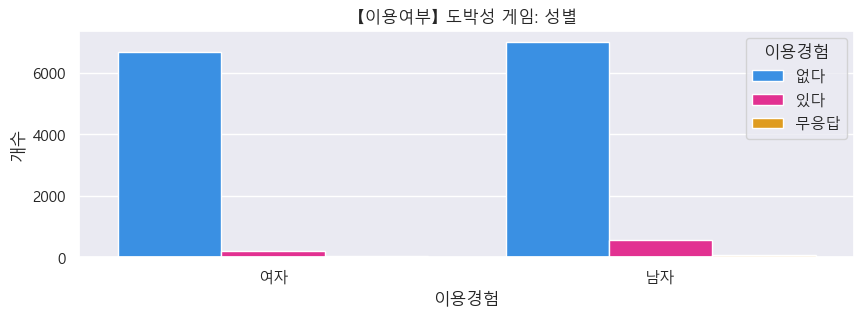

,초등학교,중학교,고등학교,합계,초등학교비율,중학교비율,고등학교비율
있다,279,153,308,740,0.060103,0.034475,0.056452
없다,4298,4241,5122,13661,0.925894,0.955611,0.938783
무응답,65,44,26,135,0.014003,0.009914,0.004765


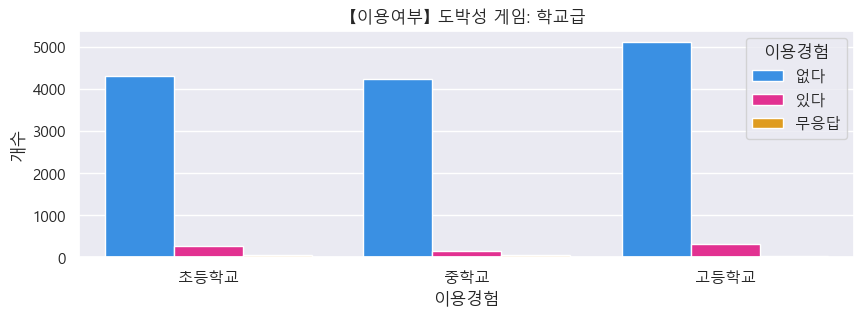

In [19]:
show_use(gamble_game, '도박성 게임')

### 【이용여부】 성인용 음악영상 파일 : 전체/성별/학교급

In [20]:
adults_audio = data.copy()
aa_columns = ['YM0503', 'YM05_103', 'DM1', 'DM3']
aa_columns_replace_dict = {'YM0503':'이용경험', 'YM05_103':'나이확인',
                           'DM1':'성별', 'DM3':'학교급'}
adults_audio = adults_audio.loc[:, aa_columns]
adults_audio = adults_audio.rename(columns=aa_columns_replace_dict)
adults_audio

,이용경험,나이확인,성별,학교급
1,2,NaN,2,1
2,9,NaN,2,1
3,2,NaN,2,1
4,2,NaN,2,1
5,2,NaN,2,1
...,...,...,...,...
14532,2,NaN,1,3
14533,2,NaN,1,3
14534,1,1,1,3
14535,2,NaN,1,3


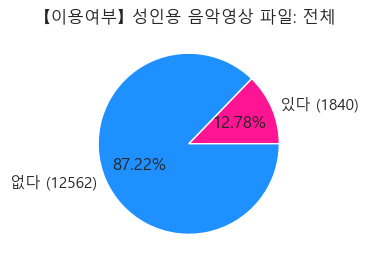

,여자,남자,합계,여자비율,남자비율
있다,816,1024,1840,0.118209,0.134154
없다,6036,6526,12562,0.874402,0.854972
무응답,51,83,134,0.007388,0.010874


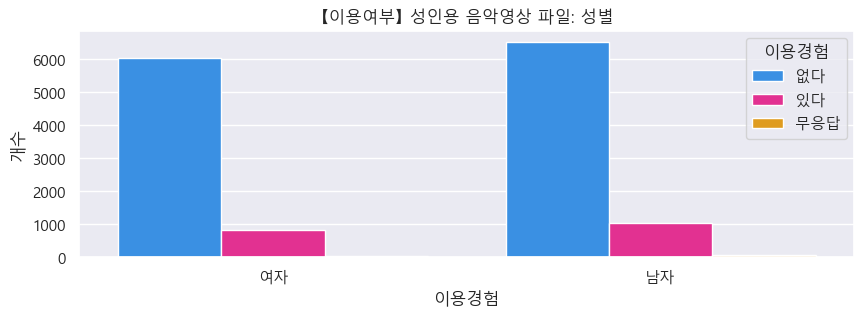

,초등학교,중학교,고등학교,합계,초등학교비율,중학교비율,고등학교비율
있다,320,516,1004,1840,0.068936,0.116269,0.184018
없다,4260,3874,4428,12562,0.917708,0.872916,0.811584
무응답,62,48,24,134,0.013356,0.010816,0.004399


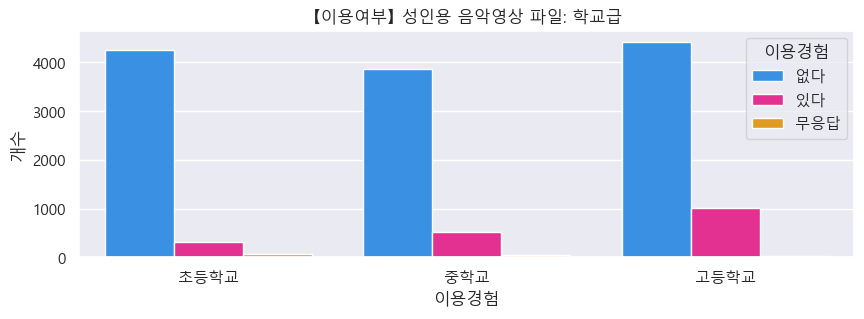

In [21]:
show_use(adults_audio, '성인용 음악영상 파일')

### 【이용여부】 조건만남 메신저/채팅앱 : 전체/성별/학교급 

In [22]:
chat = data.copy()
c_columns = ['YM0504', 'YM05_104', 'DM1', 'DM3']
c_columns_replace_dict = {'YM0504':'이용경험', 'YM05_104':'나이확인',
                           'DM1':'성별', 'DM3':'학교급'}
chat = chat.loc[:, c_columns]
chat = chat.rename(columns=c_columns_replace_dict)
chat

,이용경험,나이확인,성별,학교급
1,2,NaN,2,1
2,9,NaN,2,1
3,2,NaN,2,1
4,2,NaN,2,1
5,2,NaN,2,1
...,...,...,...,...
14532,2,NaN,1,3
14533,2,NaN,1,3
14534,2,NaN,1,3
14535,2,NaN,1,3


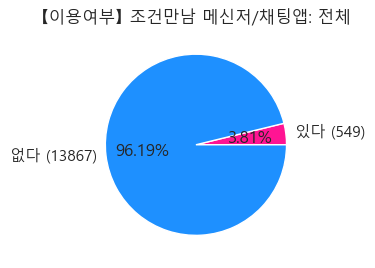

,여자,남자,합계,여자비율,남자비율
있다,237,312,549,0.034333,0.040875
없다,6620,7247,13867,0.959003,0.949430
무응답,46,74,120,0.006664,0.009695


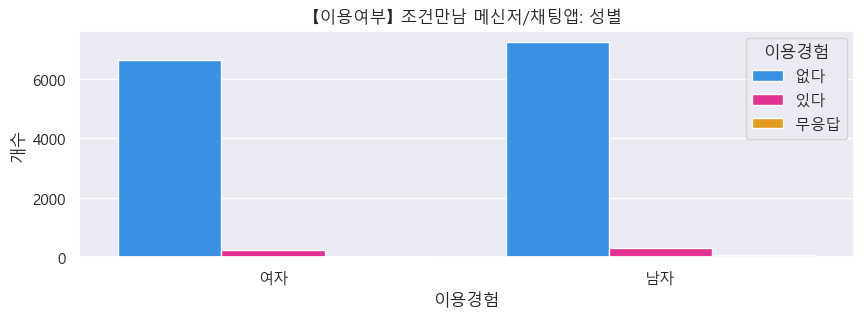

,초등학교,중학교,고등학교,합계,초등학교비율,중학교비율,고등학교비율
있다,250,134,165,549,0.053856,0.030194,0.030242
없다,4336,4262,5269,13867,0.934080,0.960342,0.965726
무응답,56,42,22,120,0.012064,0.009464,0.004032


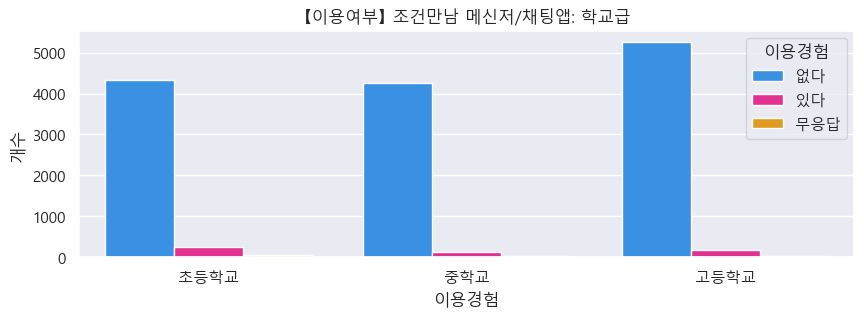

In [23]:
show_use(chat, '조건만남 메신저/채팅앱')

### 【나이확인】 신변종 유해매체물

# ⏩ 분석 결과 1

- 성인용 영상물, 성인용 간행물, 성인용 게임 순으로 이용 여부 수가 많다. 특히 성인용 영상물과 같은 경우에는 비율이 높다.
- 영상은 남자는 절만 가까이 ~~ 와 같은 분석
- 성인용 영상물은 인터넷 포털사이트, 인터넷개인방송/동영상사이트, 스마트폰앱으로 주로 접한다.
- 선인용 간행물은 웹툰, 책, 인터넷소설로 주로 접한다.

---

# 💛 유해 컨텐츠 상위 이용경로 분석

### 【이용여부】 TV방송 & 인터넷개인방송/동영상사이트 & 웹툰

In [24]:
media = data.copy()
columns1 = ['YM0102A', 'YM0102B', 'YM0102C']
columns2 = ['YM0108A', 'YM0108B', 'YM0108C']
columns3 = ['YM0110A', 'YM0110B', 'YM0110C']

replace_dict1 = {'YM0102A':'이용여부', 'YM0102B':'빈도', 'YM0102C':'주이용기기'}
replace_dict2 = {'YM0108A':'이용여부', 'YM0108B':'빈도', 'YM0108C':'주이용기기'}
replace_dict3 = {'YM0110A':'이용여부', 'YM0110B':'빈도', 'YM0110C':'주이용기기'}
                             
media1 = media.loc[:, columns1]
media1 = media1.rename(columns=replace_dict1)
media2 = media.loc[:, columns2]
media2 = media2.rename(columns=replace_dict2)
media3 = media.loc[:, columns3]
media3 = media3.rename(columns=replace_dict3)

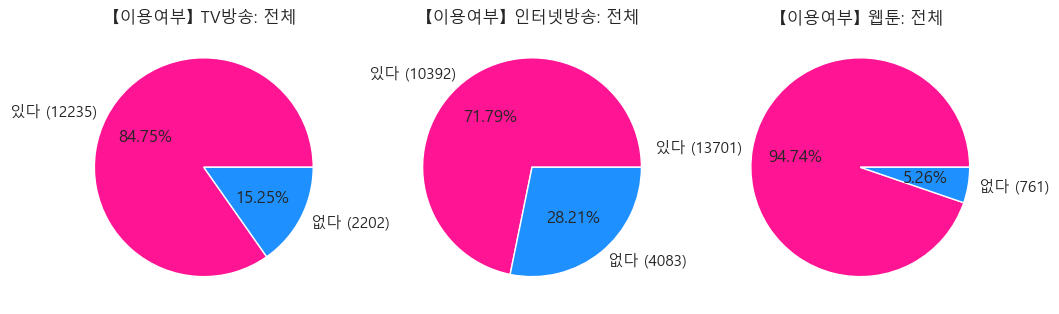

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

def show_use_pie(df, name, a):
    # [전체] 이용 경험
    
    df2 = [df.loc[df['이용여부']==1, '이용여부'].count(), df.loc[df['이용여부']==2, '이용여부'].count()]
    labels = [f'있다 ({df2[0]})', f'없다 ({df2[1]})']
    colors=['deeppink', 'dodgerblue']
    a.pie(df2, labels = labels, colors = colors, autopct='%.2f%%')
    a.set_title('【이용여부】 ' + name + ': 전체')


show_use_pie(media1, 'TV방송', ax1)
show_use_pie(media2, '인터넷방송', ax2)
show_use_pie(media3, '웹툰', ax3)

plt.show()

### 【이용빈도】 TV방송 & 인터넷개인방송/동영상사이트 & 웹툰

In [26]:
def restruct_df(df, name):
    df = df.loc[df['이용여부']==1, ['빈도', '주이용기기']]
    freq_dict = {1:'자주', 2:'자주', 3:'가끔', 4:'가끔', 9:'무응답'}
    device_dict = {1:'PC/노트북', 2:'스마트폰', 3:'태블릿 PC/스마트패드', 4:'TV', 9:'무응답'}
    df['빈도'].replace(freq_dict, inplace=True)
    df['주이용기기'].replace(device_dict, inplace=True)
    df['이용경로'] = name
    return df
media1 = restruct_df(media1, 'TV방송')
media2 = restruct_df(media2, '인터넷방송')
media3 = restruct_df(media3, '웹툰')
media_freq = pd.concat([media1, media2, media3], axis=0)
media_freq

,빈도,주이용기기,이용경로
2,가끔,TV,TV방송
3,자주,TV,TV방송
4,자주,스마트폰,TV방송
5,자주,TV,TV방송
6,자주,TV,TV방송
...,...,...,...
14532,가끔,PC/노트북,웹툰
14533,자주,PC/노트북,웹툰
14534,자주,스마트폰,웹툰
14535,자주,스마트폰,웹툰


,TV방송,인터넷방송,웹툰,합계,TV방송비율,인터넷방송비율,웹툰비율
자주,9982,8505,13140,31627,0.815856,0.818418,0.959054
가끔,2117,1790,475,4382,0.173028,0.172248,0.034669
무응답,136,97,86,319,0.011116,0.009334,0.006277


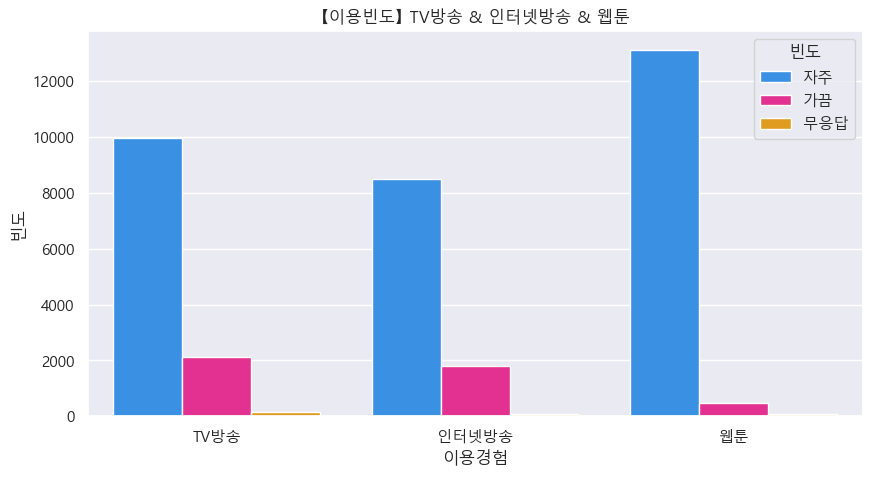

In [27]:
temp = media_freq.copy()
plt.figure(figsize=(10, 5))
new_df = pd.DataFrame({'TV방송': [temp.groupby('이용경로')['빈도'].apply(lambda x: (x == '자주').sum()).loc['TV방송'],
                            temp.groupby('이용경로')['빈도'].apply(lambda x: (x == '가끔').sum()).loc['TV방송'],
                            temp.groupby('이용경로')['빈도'].apply(lambda x: (x == '무응답').sum()).loc['TV방송']],
                       '인터넷방송': [temp.groupby('이용경로')['빈도'].apply(lambda x: (x == '자주').sum()).loc['인터넷방송'],
                            temp.groupby('이용경로')['빈도'].apply(lambda x: (x == '가끔').sum()).loc['인터넷방송'],
                            temp.groupby('이용경로')['빈도'].apply(lambda x: (x == '무응답').sum()).loc['인터넷방송']],
                        '웹툰': [temp.groupby('이용경로')['빈도'].apply(lambda x: (x == '자주').sum()).loc['웹툰'],
                            temp.groupby('이용경로')['빈도'].apply(lambda x: (x == '가끔').sum()).loc['웹툰'],
                            temp.groupby('이용경로')['빈도'].apply(lambda x: (x == '무응답').sum()).loc['웹툰']],
                   '합계': [temp.groupby('이용경로')['빈도'].apply(lambda x: (x == '자주').sum()).sum(),
                           temp.groupby('이용경로')['빈도'].apply(lambda x: (x == '가끔').sum()).sum(),
                           temp.groupby('이용경로')['빈도'].apply(lambda x: (x == '무응답').sum()).sum()]},
                  index=['자주', '가끔', '무응답'])

# 결과 출력
new_df2 = new_df.drop('합계', axis=1)
new_df2 = new_df2.div(new_df2.sum(axis=0), axis=1)
new_df2 = new_df2.rename(columns={'TV방송':'TV방송비율', '인터넷방송':'인터넷방송비율', '웹툰':'웹툰비율'})
new_df3 = pd.merge(new_df, new_df2, left_index=True, right_index=True)
display(new_df3)

# 시각화
sns.countplot(x='이용경로', hue='빈도', data=media_freq, palette=['dodgerblue', 'deeppink', 'orange'], hue_order=['자주', '가끔', '무응답'])
plt.title('【이용빈도】 TV방송 & 인터넷방송 & 웹툰')
plt.xlabel('이용경험')
plt.ylabel('빈도')
plt.show()

### 【주이용기기】 TV방송 & 인터넷개인방송/동영상사이트 & 웹툰

In [28]:
media_freq

,빈도,주이용기기,이용경로
2,가끔,TV,TV방송
3,자주,TV,TV방송
4,자주,스마트폰,TV방송
5,자주,TV,TV방송
6,자주,TV,TV방송
...,...,...,...
14532,가끔,PC/노트북,웹툰
14533,자주,PC/노트북,웹툰
14534,자주,스마트폰,웹툰
14535,자주,스마트폰,웹툰


In [29]:
m1 = media_freq.loc[media_freq['이용경로']=='TV방송', '주이용기기']
m1.value_counts()
m1 = [614, 2425, 279, 8550]

In [30]:
m2 = media_freq.loc[media_freq['이용경로']=='인터넷방송', '주이용기기']
m2.value_counts()
m2 = [489, 9212, 222, 81]

In [31]:
m3 = media_freq.loc[media_freq['이용경로']=='웹툰', '주이용기기']
m3.value_counts()
m3 = [1253, 10701, 616, 295]

In [32]:
cols = ['PC/노트북', '스마트폰', '태블릿 PC/스마트패드', 'TV']
new_dict = {}
for i in range(4):
    new_dict[cols[i]] = [m1[i], m2[i], m3[i]]

devices_df = pd.DataFrame(new_dict)
devices_df

,PC/노트북,스마트폰,태블릿 PC/스마트패드,TV
0,614,2425,279,8550
1,489,9212,222,81
2,1253,10701,616,295


In [33]:
cols = ['PC/노트북', '스마트폰', '태블릿 PC/스마트패드', 'TV']
new_dict = {}
for i in range(4):
    new_dict[cols[i]] = [m1[i], m2[i], m3[i]]

devices_df = pd.DataFrame(new_dict)
devices_df = devices_df.T.reset_index()
devices_df = devices_df.rename(columns={'index':'이용기기', 0:'TV방송', 1:'인터넷방송', 2:'웹툰'})
devices_df['합계'] = devices_df['TV방송'] + devices_df['인터넷방송'] + devices_df['웹툰']
devices_df = devices_df.sort_values('합계', ascending=False).reset_index()
devices_df.drop(['index', '합계'], axis=1, inplace=True)
devices_df

,이용기기,TV방송,인터넷방송,웹툰
0,스마트폰,2425,9212,10701
1,TV,8550,81,295
2,PC/노트북,614,489,1253
3,태블릿 PC/스마트패드,279,222,616


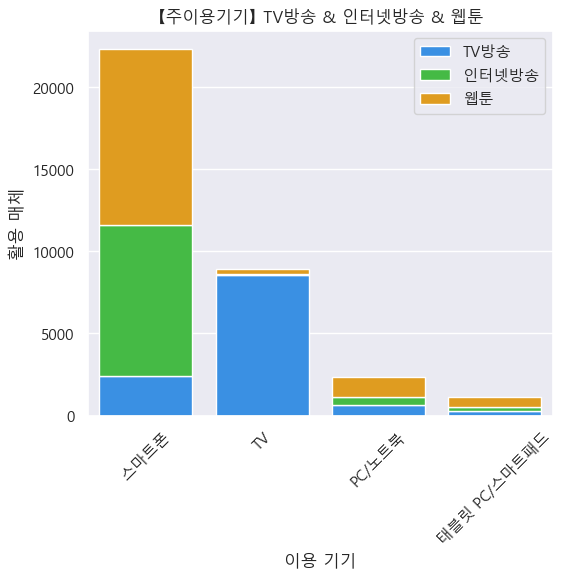

In [34]:
colors = ['dodgerblue', 'limegreen', 'orange']
my_labels = ['TV방송', '인터넷방송', '웹툰']
my_columns = ['TV방송', '인터넷방송', '웹툰']

# 정렬
sums = devices_df[my_columns].sum(axis=0)
sort_order = sums.sort_values(ascending=False).index


# 막대그래프를 그립니다
plt.figure(figsize=(6, 5))
ax = None  # 첫 번째 ax 객체를 초기화합니다
for i, col in enumerate(my_columns):
    ax = sns.barplot(data=devices_df, x='이용기기', y=col, bottom=devices_df[my_columns[:i]].sum(axis=1), color=colors[i], ax=ax, label=my_labels[i])
    
# 범례와 축 레이블을 추가합니다
ax.legend()
ax.set(xlabel='이용 기기', ylabel='활용 매체')
plt.title('【주이용기기】 TV방송 & 인터넷방송 & 웹툰')
plt.xticks(rotation=45)

# 그래프를 출력합니다
plt.show()

# ⏩ 분석 결과 2
- 청소년 절반 이상이 TV방송, 인터넷방송, 웹툰을 본다.
- 빈도로는 웹툰>TV방송>인터넷 방송 순으로 자주 본다.
- 해당 컨텐츠는 스마트폰, TV로 주로 보며 압도적으로 스마트폰을 이용해서 보는 학생 수가 많다.

---

# 💛 주이용기기 유해 차단 프로그램 설치 여부

### 【설치여부】 전체

In [35]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# def show_use_pie(df, name, a):
#     # [전체] 이용 경험
    
#     df2 = [df.loc[df['이용여부']==1, '이용여부'].count(), df.loc[df['이용여부']==2, '이용여부'].count()]
#     labels = [f'있다 ({df2[0]})', f'없다 ({df2[1]})']
#     colors=['deeppink', 'dodgerblue']
#     a.pie(df2, labels = labels, colors = colors, autopct='%.2f%%')
#     a.set_title('【이용여부】 ' + name + ': 전체')


# show_use_pie(media1, 'TV방송', ax1)
# show_use_pie(media2, '인터넷방송', ax2)
# show_use_pie(media3, '웹툰', ax3)

# plt.show()

In [36]:
lock = data.copy()
lk_columns = ['YM0604', 'YM06_104', 'DM1', 'DM3']
lk_columns_replace_dict = {'YM0604':'기기사용여부', 'YM06_104':'차단프로그램설치여부',
                           'DM1':'성별', 'DM3':'학교급'}
lock = lock.loc[:, lk_columns]
lock = lock.rename(columns=lk_columns_replace_dict)
lock

,기기사용여부,차단프로그램설치여부,성별,학교급
1,1,3,2,1
2,9,NaN,2,1
3,1,3,2,1
4,1,3,2,1
5,1,2,2,1
...,...,...,...,...
14532,1,2,1,3
14533,1,3,1,3
14534,1,2,1,3
14535,1,2,1,3


In [37]:
lock.loc[lock['기기사용여부']==1]

,기기사용여부,차단프로그램설치여부,성별,학교급
1,1,3,2,1
3,1,3,2,1
4,1,3,2,1
5,1,2,2,1
6,1,1,2,1
...,...,...,...,...
14532,1,2,1,3
14533,1,3,1,3
14534,1,2,1,3
14535,1,2,1,3


In [38]:
lock.loc[lock['차단프로그램설치여부']==1, '차단프로그램설치여부'].count()

3252

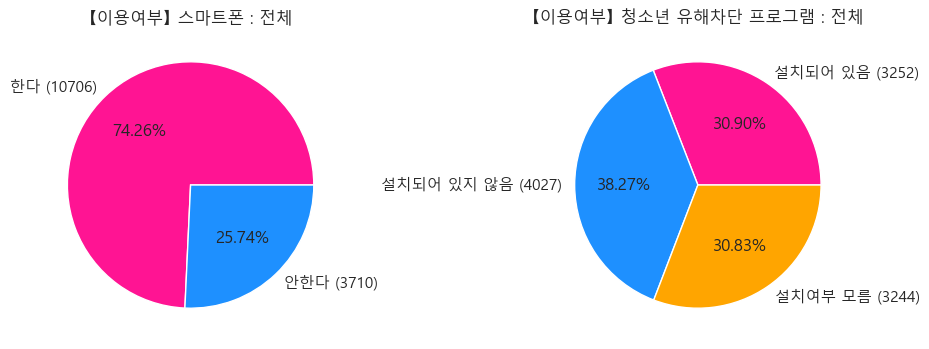

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 스마트폰 : 전체
lock_device_yesno = [lock.loc[lock['기기사용여부']==1, '기기사용여부'].count(), lock.loc[lock['기기사용여부']==2, '기기사용여부'].count()]
labels = [f'한다 ({lock_device_yesno[0]})', f'안한다 ({lock_device_yesno[1]})']
colors=['deeppink', 'dodgerblue']
ax1.pie(lock_device_yesno, labels = labels, colors = colors, autopct='%.2f%%')
ax1.set_title('【이용여부】 스마트폰 : 전체')

# 스마트폰 유해차단 
lock_app_yesno =  [lock.loc[lock['차단프로그램설치여부']==1, '차단프로그램설치여부'].count(), 
                   lock.loc[lock['차단프로그램설치여부']==2, '차단프로그램설치여부'].count(), 
                   lock.loc[lock['차단프로그램설치여부']==3, '차단프로그램설치여부'].count()]
labels = [f'설치되어 있음 ({lock_app_yesno[0]})', f'설치되어 있지 않음 ({lock_app_yesno[1]})', f'설치여부 모름 ({lock_app_yesno[2]})']
colors=['deeppink', 'dodgerblue', 'orange']
ax2.pie(lock_app_yesno, labels = labels, colors = colors, autopct='%.2f%%')
ax2.set_title('【이용여부】 청소년 유해차단 프로그램 : 전체')


plt.show()

### 【설치여부】 학교급 별

In [40]:
lock.head()

,기기사용여부,차단프로그램설치여부,성별,학교급
1,1,3,2,1
2,9,NaN,2,1
3,1,3,2,1
4,1,3,2,1
5,1,2,2,1


In [41]:
lock['학교급'].value_counts()

3    5456
1    4642
2    4438
Name: 학교급, dtype: int64

In [42]:
lock['차단프로그램설치여부'].value_counts()

2    4027
1    3252
3    3244
9     183
Name: 차단프로그램설치여부, dtype: int64

In [43]:
dicts = {1: '설치되어 있음', 2:'설치되어 있지 않음', 3:'설치여부 모름', 9:'무응답', np.nan: '무응답'}
lock['차단프로그램설치여부'] = lock['차단프로그램설치여부'].map(dicts)
lock['차단프로그램설치여부'].value_counts()

설치되어 있지 않음    4027
무응답           4013
설치되어 있음       3252
설치여부 모름       3244
Name: 차단프로그램설치여부, dtype: int64

In [47]:
dicts = {1: '초등학교', 2:'중학교', 3:'고등학교', 9:'무응답', np.nan: '무응답'}
lock['학교급'] = lock['학교급'].map(dicts)
lock['학교급'].value_counts()

고등학교    5456
초등학교    4642
중학교     4438
Name: 학교급, dtype: int64

In [48]:
lock

,기기사용여부,차단프로그램설치여부,성별,학교급
1,1,설치여부 모름,2,초등학교
2,9,무응답,2,초등학교
3,1,설치여부 모름,2,초등학교
4,1,설치여부 모름,2,초등학교
5,1,설치되어 있지 않음,2,초등학교
...,...,...,...,...
14532,1,설치되어 있지 않음,1,고등학교
14533,1,설치여부 모름,1,고등학교
14534,1,설치되어 있지 않음,1,고등학교
14535,1,설치되어 있지 않음,1,고등학교


,초등학교,중학교,고등학교,합계,초등학교비율,중학교비율,고등학교비율
설치되어 있음,1624,877,751,3252,0.474576,0.264236,0.198572
설치되어 있지 않음,761,1392,1874,4027,0.222385,0.419403,0.495505
설치여부 모름,1037,1050,1157,3244,0.303039,0.316360,0.305923


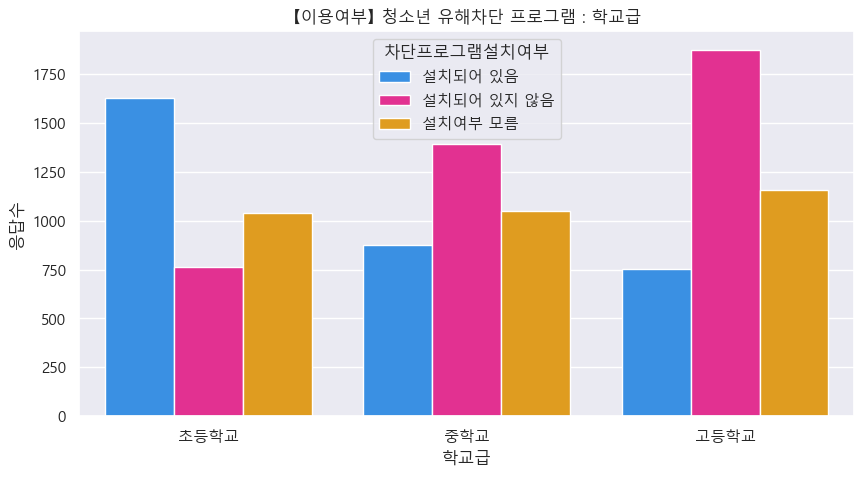

In [49]:
temp = lock.copy()
plt.figure(figsize=(10, 5))
new_df = pd.DataFrame({'초등학교': [temp.groupby('학교급')['차단프로그램설치여부'].apply(lambda x: (x == '설치되어 있음').sum()).loc['초등학교'],
                            temp.groupby('학교급')['차단프로그램설치여부'].apply(lambda x: (x == '설치되어 있지 않음').sum()).loc['초등학교'],
                            temp.groupby('학교급')['차단프로그램설치여부'].apply(lambda x: (x == '설치여부 모름').sum()).loc['초등학교']],
                       '중학교': [temp.groupby('학교급')['차단프로그램설치여부'].apply(lambda x: (x == '설치되어 있음').sum()).loc['중학교'],
                            temp.groupby('학교급')['차단프로그램설치여부'].apply(lambda x: (x == '설치되어 있지 않음').sum()).loc['중학교'],
                            temp.groupby('학교급')['차단프로그램설치여부'].apply(lambda x: (x == '설치여부 모름').sum()).loc['중학교']],
                        '고등학교': [temp.groupby('학교급')['차단프로그램설치여부'].apply(lambda x: (x == '설치되어 있음').sum()).loc['고등학교'],
                            temp.groupby('학교급')['차단프로그램설치여부'].apply(lambda x: (x == '설치되어 있지 않음').sum()).loc['고등학교'],
                            temp.groupby('학교급')['차단프로그램설치여부'].apply(lambda x: (x == '설치여부 모름').sum()).loc['고등학교']],
                        '합계': [temp.groupby('학교급')['차단프로그램설치여부'].apply(lambda x: (x == '설치되어 있음').sum()).sum(),
                           temp.groupby('학교급')['차단프로그램설치여부'].apply(lambda x: (x == '설치되어 있지 않음').sum()).sum(),
                           temp.groupby('학교급')['차단프로그램설치여부'].apply(lambda x: (x == '설치여부 모름').sum()).sum()]},
                  index=['설치되어 있음', '설치되어 있지 않음', '설치여부 모름'])

# 결과 출력
new_df2 = new_df.drop('합계', axis=1)
new_df2 = new_df2.div(new_df2.sum(axis=0), axis=1)
new_df2 = new_df2.rename(columns={'초등학교':'초등학교비율', '중학교':'중학교비율', '고등학교':'고등학교비율'})
new_df3 = pd.merge(new_df, new_df2, left_index=True, right_index=True)
display(new_df3)

# 시각화
sns.countplot(x='학교급', hue='차단프로그램설치여부', data=lock, palette=['dodgerblue', 'deeppink', 'orange'], hue_order=['설치되어 있음', '설치되어 있지 않음', '설치여부 모름'])
plt.title('【이용여부】 청소년 유해차단 프로그램 : 학교급')
plt.xlabel('학교급')
plt.ylabel('응답수')
plt.show()

# ⏩ 분석 결과 3

- 청소년 유해차단 프로그램이 설치되어 있지 않은 학생의 수가 더 많음

# 💛 건전한 인터넷 / 스마트폰 이용교육

In [50]:
edu_data = data_raw.copy()
edu_columns = ['YM1001', 'YM10_101', 'YM1003', 'YM10_103', 'DM1', 'DM3']
edu_columns_replace_dict = {'YM1001':'예방교육여부', 'YM10_101':'예방교육도움정도',
                            'YM1003':'이용교육여부', 'YM10_103':'이용교육도움정도',
                           'DM1':'성별', 'DM3':'학교급'}
edu_data = edu_data.loc[:, edu_columns]
edu_data = edu_data.rename(columns=edu_columns_replace_dict)
edu_data

,예방교육여부,예방교육도움정도,이용교육여부,이용교육도움정도,성별,학교급
1,2,NaN,1,3,2,1
2,1,3,1,3,2,1
3,1,3,1,3,2,1
4,1,3,1,3,2,1
5,1,3,1,3,2,1
...,...,...,...,...,...,...
14532,1,1,2,NaN,1,3
14533,1,1,1,1,1,3
14534,2,NaN,2,NaN,1,3
14535,2,NaN,2,NaN,1,3


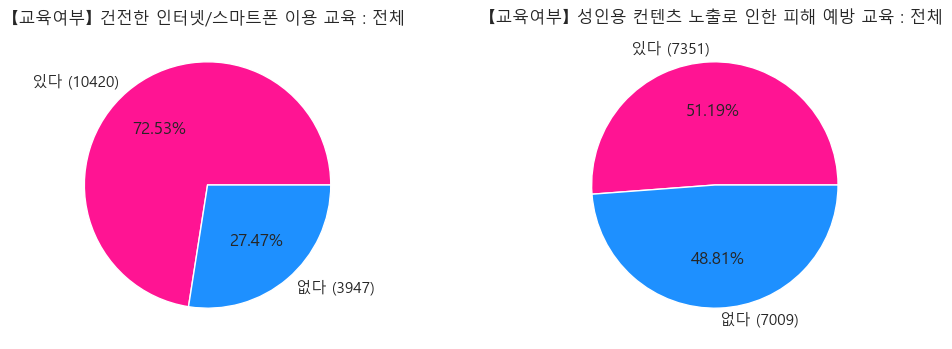

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 스마트폰 : 전체
lock_device_yesno = [edu_data.loc[edu_data['이용교육여부']==1, '이용교육여부'].count(), edu_data.loc[edu_data['이용교육여부']==2, '이용교육여부'].count()]
labels = [f'있다 ({lock_device_yesno[0]})', f'없다 ({lock_device_yesno[1]})']
colors=['deeppink', 'dodgerblue']
ax1.pie(lock_device_yesno, labels = labels, colors = colors, autopct='%.2f%%')
ax1.set_title('【교육여부】 건전한 인터넷/스마트폰 이용 교육 : 전체')

#  : 전체
lock_device_yesno = [edu_data.loc[edu_data['예방교육여부']==1, '예방교육여부'].count(), edu_data.loc[edu_data['예방교육여부']==2, '예방교육여부'].count()]
labels = [f'있다 ({lock_device_yesno[0]})', f'없다 ({lock_device_yesno[1]})']
colors=['deeppink', 'dodgerblue']
ax2.pie(lock_device_yesno, labels = labels, colors = colors, autopct='%.2f%%')
ax2.set_title('【교육여부】 성인용 컨텐츠 노출로 인한 피해 예방 교육 : 전체')


plt.show()

In [52]:
edu_data['예방교육도움정도'].value_counts()

3    3748
4    1399
2    1127
1     911
9     166
Name: 예방교육도움정도, dtype: int64

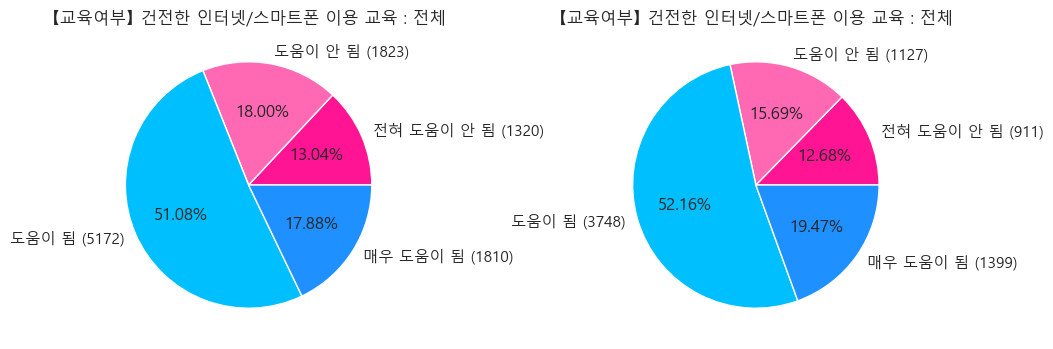

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 스마트폰 : 전체
lock_device_yesno = [edu_data.loc[edu_data['이용교육도움정도']==1, '이용교육도움정도'].count(),
                     edu_data.loc[edu_data['이용교육도움정도']==2, '이용교육도움정도'].count(),
                     edu_data.loc[edu_data['이용교육도움정도']==3, '이용교육도움정도'].count(),
                     edu_data.loc[edu_data['이용교육도움정도']==4, '이용교육도움정도'].count()]
labels = [f'전혀 도움이 안 됨 ({lock_device_yesno[0]})', f'도움이 안 됨 ({lock_device_yesno[1]})', f'도움이 됨 ({lock_device_yesno[2]})', f'매우 도움이 됨 ({lock_device_yesno[3]})']
colors=['deeppink', 'hotpink', 'deepskyblue', 'dodgerblue']
ax1.pie(lock_device_yesno, labels = labels, colors = colors, autopct='%.2f%%')
ax1.set_title('【교육여부】 건전한 인터넷/스마트폰 이용 교육 : 전체')


# 스마트폰 : 전체
lock_device_yesno = [edu_data.loc[edu_data['예방교육도움정도']==1, '예방교육도움정도'].count(),
                     edu_data.loc[edu_data['예방교육도움정도']==2, '예방교육도움정도'].count(),
                     edu_data.loc[edu_data['예방교육도움정도']==3, '예방교육도움정도'].count(),
                     edu_data.loc[edu_data['예방교육도움정도']==4, '예방교육도움정도'].count()]
labels = [f'전혀 도움이 안 됨 ({lock_device_yesno[0]})', f'도움이 안 됨 ({lock_device_yesno[1]})', f'도움이 됨 ({lock_device_yesno[2]})', f'매우 도움이 됨 ({lock_device_yesno[3]})']
colors=['deeppink', 'hotpink', 'deepskyblue', 'dodgerblue']
ax2.pie(lock_device_yesno, labels = labels, colors = colors, autopct='%.2f%%')
ax2.set_title('【교육여부】 건전한 인터넷/스마트폰 이용 교육 : 전체')


plt.show()